In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import sem
from scipy.stats import ranksums
from tqdm import tqdm

from active_learning import ActiveLearningLabeler, RandomSampler, UncertaintySampler, KMeansUncertaintySampler, EntropySampler, SelfTrainingSampler

# Breast cancer dataset

### Set up breast cancer dataset experiment

In [34]:
def get_cancer_data():
    df = load_breast_cancer()
    X_raw = df['data']
    y_raw = df['target']
    X_train, X_test, y_train, y_test  = train_test_split(X_raw, y_raw, test_size=0.2)
    return X_train, X_test, y_test, y_train

In [35]:
def eval_model(model, X_test, y_test):
    return accuracy_score(y_test, model.predict(X_test))

In [36]:
unlabeled, X_test, y_test, y_train = get_cancer_data()
model = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_split=2, random_state=1)

sample_size=3
init_train_size=5
iters=40
repeat_n = 50

### Run experiment

#### Random

In [ ]:
al = ActiveLearningLabeler(n_iters=iters, samplers=[RandomSampler(sample_size=sample_size)],
                           init_train_size=init_train_size)

random_metrics = []
for n in tqdm(range(repeat_n)):
    accuracies = al.label(unlabeled=unlabeled, model=model, X_test=X_test, y_test=y_test, labels=y_train,
                         eval_function=eval_model)
    random_metrics.append(accuracies)

#### Uncertainty

In [ ]:
al = ActiveLearningLabeler(n_iters=iters, samplers=[UncertaintySampler(sample_size=sample_size)],
                           init_train_size=init_train_size)

uncert_metrics = []
for n in tqdm(range(repeat_n)):
    accuracies = al.label(unlabeled=unlabeled, model=model, X_test=X_test, y_test=y_test, labels=y_train,
                         eval_function=eval_model)
    uncert_metrics.append(accuracies)

#### Entropy

In [ ]:
al = ActiveLearningLabeler(n_iters=iters, samplers=[EntropySampler(sample_size=sample_size)],
                           init_train_size=init_train_size)

entropy_metrics = []
for n in tqdm(range(repeat_n)):
    accuracies = al.label(unlabeled=unlabeled, model=model, X_test=X_test, y_test=y_test, labels=y_train,
                         eval_function=eval_model)
    entropy_metrics.append(accuracies)

#### KMeans Uncertainty

In [21]:
unlabeled, X_test, y_test, y_train = get_cancer_data()

In [22]:
from sklearn.preprocessing import StandardScaler

unlabeled = StandardScaler().fit_transform(unlabeled)
X_test = StandardScaler().fit_transform(X_test)

In [ ]:
al = ActiveLearningLabeler(n_iters=iters,
                           samplers=[KMeansUncertaintySampler(sample_size=sample_size, n_clusters=2)],
                           init_train_size=init_train_size)

kmeans_metrics = []
for n in tqdm(range(repeat_n)):
    accuracies = al.label(unlabeled=unlabeled, model=model, X_test=X_test, y_test=y_test, labels=y_train,
                         eval_function=eval_model)
    kmeans_metrics.append(accuracies)

### Plot results

[]

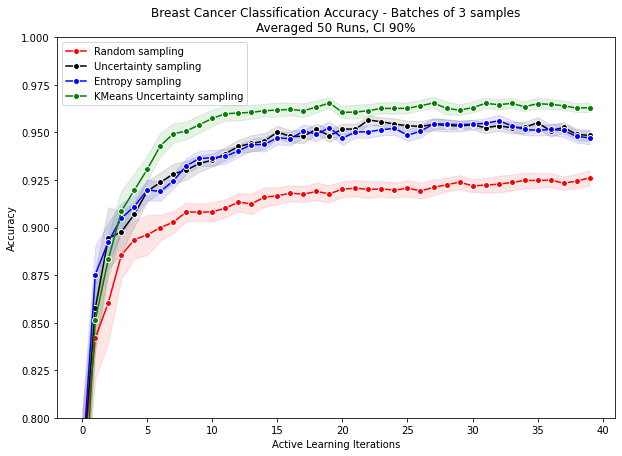

In [38]:
fig = plt.figure(figsize=(10,7))

random_mean = np.mean(random_metrics, axis=0)
uncert_mean = np.mean(uncert_metrics, axis=0)
entropy_mean = np.mean(entropy_metrics, axis=0)
kmeans_mean = np.mean(kmeans_metrics, axis=0) 

plt.plot(random_mean, c="red", marker="o", markersize=6, markeredgecolor="white", label="Random sampling")
plt.plot(uncert_mean, c="black", marker="o", markersize=6, markeredgecolor="white", label="Uncertainty sampling")
plt.plot(entropy_mean, c="blue", marker="o", markersize=6, markeredgecolor="white", label="Entropy sampling")
plt.plot(kmeans_mean, c="green", marker="o", markersize=6, markeredgecolor="white", label="KMeans Uncertainty sampling")


zscore_90_confidence = 1.65
random_ci = sem(random_metrics) * zscore_90_confidence
plt.fill_between(range(len(random_mean)), (random_mean-random_ci), (random_mean+random_ci), color='red', alpha=0.1)
uncert_ci = sem(uncert_metrics) * zscore_90_confidence
plt.fill_between(range(len(uncert_mean)), (uncert_mean-uncert_ci),(uncert_mean+uncert_ci), color='black', alpha=0.1)
entropy_ci = sem(entropy_metrics) * zscore_90_confidence
plt.fill_between(range(len(entropy_mean)), (entropy_mean-entropy_ci),(entropy_mean+entropy_ci), color='blue', alpha=0.1)
kmeans_ci = sem(kmeans_metrics) * zscore_90_confidence
plt.fill_between(range(len(kmeans_mean)), (kmeans_mean-kmeans_ci),(kmeans_mean+kmeans_ci), color='green', alpha=0.1)

plt.title(f"Breast Cancer Classification Accuracy - Batches of {sample_size} samples\nAveraged {repeat_n} Runs, CI 90%")
plt.ylim((0.8, 1))
plt.xlabel("Active Learning Iterations")
plt.ylabel("Accuracy")
plt.legend()
plt.plot()

In [32]:
random_metrics = [[0.8947368421052632, 0.9035087719298246, 0.8947368421052632, 0.9122807017543859, 0.8508771929824561, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9298245614035088, 0.9298245614035088, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9210526315789473, 0.9122807017543859, 0.9035087719298246, 0.9210526315789473, 0.9122807017543859, 0.9122807017543859, 0.8947368421052632, 0.9298245614035088, 0.9210526315789473, 0.9035087719298246, 0.9035087719298246, 0.9122807017543859, 0.9035087719298246, 0.9122807017543859, 0.9210526315789473, 0.9298245614035088, 0.9122807017543859, 0.9122807017543859, 0.9210526315789473, 0.8859649122807017, 0.8947368421052632, 0.9298245614035088, 0.9298245614035088, 0.9473684210526315, 0.9122807017543859, 0.9210526315789473, 0.9298245614035088], [0.868421052631579, 0.868421052631579, 0.8070175438596491, 0.9035087719298246, 0.9122807017543859, 0.9210526315789473, 0.9035087719298246, 0.9122807017543859, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088], [0.7631578947368421, 0.9035087719298246, 0.9122807017543859, 0.8947368421052632, 0.8947368421052632, 0.9035087719298246, 0.8859649122807017, 0.8859649122807017, 0.8859649122807017, 0.8859649122807017, 0.9122807017543859, 0.9122807017543859, 0.9035087719298246, 0.8859649122807017, 0.8947368421052632, 0.8947368421052632, 0.8947368421052632, 0.8947368421052632, 0.9035087719298246, 0.9122807017543859, 0.9210526315789473, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9122807017543859, 0.9473684210526315, 0.9473684210526315, 0.9122807017543859, 0.9035087719298246, 0.8947368421052632, 0.9035087719298246, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9035087719298246, 0.9122807017543859, 0.9122807017543859], [0.8947368421052632, 0.8947368421052632, 0.8771929824561403, 0.868421052631579, 0.8771929824561403, 0.9035087719298246, 0.9035087719298246, 0.9035087719298246, 0.9122807017543859, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9122807017543859, 0.9122807017543859, 0.8947368421052632, 0.8947368421052632, 0.9035087719298246, 0.9035087719298246, 0.9035087719298246, 0.8947368421052632, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9122807017543859, 0.9035087719298246, 0.8947368421052632, 0.9035087719298246], [0.7807017543859649, 0.8508771929824561, 0.8771929824561403, 0.8947368421052632, 0.9035087719298246, 0.9035087719298246, 0.8947368421052632, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9473684210526315, 0.9298245614035088, 0.9385964912280702, 0.9035087719298246, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9122807017543859, 0.9122807017543859, 0.9210526315789473, 0.9298245614035088, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9122807017543859, 0.9122807017543859, 0.9385964912280702, 0.9473684210526315, 0.9210526315789473, 0.9473684210526315, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9122807017543859], [0.7719298245614035, 0.9035087719298246, 0.8771929824561403, 0.8771929824561403, 0.8596491228070176, 0.868421052631579, 0.868421052631579, 0.868421052631579, 0.8596491228070176, 0.8771929824561403, 0.8947368421052632, 0.9210526315789473, 0.9210526315789473, 0.8947368421052632, 0.8947368421052632, 0.9122807017543859, 0.8947368421052632, 0.8947368421052632, 0.8947368421052632, 0.8859649122807017, 0.8947368421052632, 0.9035087719298246, 0.8947368421052632, 0.9035087719298246, 0.9122807017543859, 0.9035087719298246, 0.9035087719298246, 0.9122807017543859, 0.9298245614035088, 0.9210526315789473, 0.9122807017543859, 0.9122807017543859, 0.8947368421052632, 0.8947368421052632, 0.8859649122807017, 0.9035087719298246, 0.9035087719298246, 0.9122807017543859, 0.9035087719298246, 0.9035087719298246], [0.6403508771929824, 0.9122807017543859, 0.9035087719298246, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9385964912280702, 0.9210526315789473, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9210526315789473, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9122807017543859, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9035087719298246, 0.9035087719298246, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9122807017543859, 0.9298245614035088, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.8947368421052632, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859], [0.9122807017543859, 0.6228070175438597, 0.6403508771929824, 0.7192982456140351, 0.9035087719298246, 0.8771929824561403, 0.8859649122807017, 0.8859649122807017, 0.9035087719298246, 0.9035087719298246, 0.8947368421052632, 0.9122807017543859, 0.9035087719298246, 0.9122807017543859, 0.9035087719298246, 0.9122807017543859, 0.9035087719298246, 0.9035087719298246, 0.8859649122807017, 0.9035087719298246, 0.8859649122807017, 0.9035087719298246, 0.8947368421052632, 0.8947368421052632, 0.8859649122807017, 0.9035087719298246, 0.9035087719298246, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9122807017543859, 0.9122807017543859, 0.9210526315789473, 0.9122807017543859], [0.631578947368421, 0.6403508771929824, 0.6403508771929824, 0.8245614035087719, 0.868421052631579, 0.868421052631579, 0.8859649122807017, 0.9035087719298246, 0.9035087719298246, 0.9210526315789473, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9122807017543859, 0.9210526315789473, 0.8859649122807017, 0.9122807017543859, 0.9035087719298246, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9210526315789473, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9122807017543859, 0.9210526315789473, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9298245614035088], [0.7017543859649122, 0.868421052631579, 0.8771929824561403, 0.8771929824561403, 0.8771929824561403, 0.8771929824561403, 0.868421052631579, 0.8947368421052632, 0.9035087719298246, 0.8947368421052632, 0.8947368421052632, 0.868421052631579, 0.9035087719298246, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9122807017543859, 0.8859649122807017, 0.8947368421052632, 0.8859649122807017, 0.8947368421052632, 0.9035087719298246, 0.9035087719298246, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859], [0.6140350877192983, 0.6403508771929824, 0.6140350877192983, 0.7543859649122807, 0.9035087719298246, 0.9122807017543859, 0.8859649122807017, 0.9298245614035088, 0.9210526315789473, 0.9122807017543859, 0.9122807017543859, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702], [0.7017543859649122, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9035087719298246, 0.9210526315789473, 0.9298245614035088, 0.9122807017543859, 0.9035087719298246, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9385964912280702, 0.9210526315789473, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9122807017543859, 0.9122807017543859, 0.9210526315789473, 0.9122807017543859, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088], [0.8245614035087719, 0.8947368421052632, 0.9298245614035088, 0.9122807017543859, 0.8859649122807017, 0.8859649122807017, 0.8771929824561403, 0.8859649122807017, 0.9210526315789473, 0.9122807017543859, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9035087719298246, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9385964912280702, 0.9473684210526315], [0.631578947368421, 0.9210526315789473, 0.9210526315789473, 0.9122807017543859, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9122807017543859, 0.9298245614035088, 0.9122807017543859, 0.9210526315789473, 0.9298245614035088, 0.9122807017543859, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9210526315789473, 0.9298245614035088, 0.9385964912280702, 0.9210526315789473, 0.9298245614035088, 0.9385964912280702, 0.9473684210526315], [0.8157894736842105, 0.8596491228070176, 0.8859649122807017, 0.9210526315789473, 0.9210526315789473, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9210526315789473, 0.9122807017543859, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702], [0.8596491228070176, 0.868421052631579, 0.8771929824561403, 0.9298245614035088, 0.8771929824561403, 0.8859649122807017, 0.868421052631579, 0.8947368421052632, 0.9122807017543859, 0.9122807017543859, 0.9210526315789473, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9122807017543859, 0.8947368421052632, 0.9210526315789473, 0.9122807017543859, 0.9122807017543859, 0.9035087719298246, 0.9210526315789473, 0.9385964912280702, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9210526315789473, 0.9210526315789473], [0.8859649122807017, 0.8947368421052632, 0.9035087719298246, 0.9210526315789473, 0.9035087719298246, 0.9035087719298246, 0.8947368421052632, 0.9035087719298246, 0.9035087719298246, 0.8771929824561403, 0.8771929824561403, 0.8771929824561403, 0.8771929824561403, 0.8508771929824561, 0.8596491228070176, 0.8771929824561403, 0.8859649122807017, 0.8771929824561403, 0.8859649122807017, 0.8859649122807017, 0.8859649122807017, 0.8859649122807017, 0.9035087719298246, 0.8859649122807017, 0.9035087719298246, 0.9210526315789473, 0.9035087719298246, 0.9210526315789473, 0.9122807017543859, 0.9035087719298246, 0.9035087719298246, 0.9035087719298246, 0.8859649122807017, 0.9035087719298246, 0.8947368421052632, 0.8947368421052632, 0.9035087719298246, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859], [0.7982456140350878, 0.9035087719298246, 0.868421052631579, 0.9210526315789473, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9122807017543859, 0.8947368421052632, 0.8859649122807017, 0.8859649122807017, 0.8771929824561403, 0.8859649122807017, 0.8859649122807017, 0.8947368421052632, 0.8947368421052632, 0.9035087719298246, 0.9298245614035088, 0.9122807017543859, 0.9210526315789473, 0.9122807017543859, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9385964912280702, 0.9122807017543859, 0.9035087719298246, 0.9035087719298246, 0.9035087719298246, 0.9035087719298246, 0.8947368421052632, 0.8947368421052632, 0.9035087719298246, 0.9035087719298246, 0.9122807017543859, 0.9210526315789473, 0.9035087719298246, 0.9035087719298246, 0.9035087719298246], [0.8070175438596491, 0.8421052631578947, 0.8859649122807017, 0.868421052631579, 0.9122807017543859, 0.9035087719298246, 0.9035087719298246, 0.8771929824561403, 0.9210526315789473, 0.9122807017543859, 0.9210526315789473, 0.8947368421052632, 0.9210526315789473, 0.9385964912280702, 0.9385964912280702, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9122807017543859, 0.9122807017543859, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9473684210526315, 0.9298245614035088, 0.9473684210526315, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315], [0.9122807017543859, 0.8947368421052632, 0.9122807017543859, 0.8947368421052632, 0.8947368421052632, 0.9035087719298246, 0.9035087719298246, 0.9122807017543859, 0.8947368421052632, 0.8947368421052632, 0.8859649122807017, 0.8859649122807017, 0.8859649122807017, 0.8859649122807017, 0.8859649122807017, 0.8947368421052632, 0.8947368421052632, 0.8947368421052632, 0.8947368421052632, 0.8859649122807017, 0.9035087719298246, 0.8947368421052632, 0.9035087719298246, 0.8947368421052632, 0.9035087719298246, 0.9035087719298246, 0.9210526315789473, 0.9210526315789473, 0.9122807017543859, 0.9122807017543859, 0.9210526315789473, 0.9122807017543859, 0.9122807017543859, 0.9035087719298246, 0.9210526315789473, 0.9122807017543859, 0.9035087719298246, 0.9035087719298246, 0.8859649122807017, 0.8859649122807017], [0.8157894736842105, 0.8333333333333334, 0.9035087719298246, 0.8947368421052632, 0.8947368421052632, 0.8771929824561403, 0.8859649122807017, 0.8771929824561403, 0.868421052631579, 0.868421052631579, 0.8596491228070176, 0.868421052631579, 0.868421052631579, 0.868421052631579, 0.868421052631579, 0.9122807017543859, 0.9035087719298246, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9210526315789473, 0.9035087719298246, 0.9122807017543859, 0.9122807017543859, 0.9035087719298246, 0.9122807017543859, 0.9122807017543859, 0.9035087719298246, 0.9035087719298246, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9210526315789473, 0.9122807017543859, 0.9298245614035088, 0.9210526315789473, 0.9385964912280702, 0.9210526315789473], [0.7192982456140351, 0.8421052631578947, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.8947368421052632, 0.8859649122807017, 0.8947368421052632, 0.8859649122807017, 0.8771929824561403, 0.868421052631579, 0.8947368421052632, 0.8947368421052632, 0.8859649122807017, 0.8859649122807017, 0.8771929824561403, 0.8859649122807017, 0.8859649122807017, 0.8771929824561403, 0.8859649122807017, 0.8947368421052632, 0.8947368421052632, 0.8947368421052632, 0.8947368421052632, 0.8859649122807017, 0.8947368421052632, 0.8947368421052632, 0.8947368421052632, 0.8947368421052632, 0.8947368421052632, 0.8859649122807017, 0.8859649122807017, 0.8947368421052632, 0.8859649122807017, 0.8859649122807017, 0.8859649122807017, 0.8859649122807017, 0.8859649122807017, 0.8859649122807017, 0.8859649122807017], [0.7192982456140351, 0.9122807017543859, 0.9122807017543859, 0.9210526315789473, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9035087719298246, 0.9210526315789473, 0.9210526315789473, 0.8859649122807017, 0.8947368421052632, 0.8947368421052632, 0.8947368421052632, 0.8947368421052632, 0.8947368421052632, 0.8947368421052632, 0.8947368421052632, 0.8859649122807017, 0.8859649122807017, 0.8771929824561403, 0.868421052631579, 0.868421052631579, 0.8947368421052632, 0.9035087719298246, 0.9035087719298246, 0.8947368421052632, 0.9035087719298246, 0.9122807017543859, 0.8947368421052632, 0.9122807017543859, 0.9035087719298246, 0.9035087719298246, 0.9122807017543859, 0.9035087719298246, 0.9298245614035088, 0.9122807017543859, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702], [0.6140350877192983, 0.8771929824561403, 0.8771929824561403, 0.8771929824561403, 0.8771929824561403, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9122807017543859, 0.8947368421052632, 0.9122807017543859, 0.9122807017543859, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9473684210526315, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702], [0.6578947368421053, 0.631578947368421, 0.8947368421052632, 0.9298245614035088, 0.9385964912280702, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9035087719298246, 0.9122807017543859, 0.9122807017543859, 0.9210526315789473, 0.9122807017543859, 0.9035087719298246, 0.9035087719298246, 0.9035087719298246, 0.9122807017543859, 0.9385964912280702, 0.9385964912280702, 0.9122807017543859, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9385964912280702, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9035087719298246, 0.9035087719298246, 0.9122807017543859], [0.8245614035087719, 0.8508771929824561, 0.9035087719298246, 0.9035087719298246, 0.9035087719298246, 0.9035087719298246, 0.9035087719298246, 0.9210526315789473, 0.9385964912280702, 0.9298245614035088, 0.9035087719298246, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.956140350877193, 0.9473684210526315, 0.9385964912280702, 0.9122807017543859, 0.9298245614035088, 0.9298245614035088], [0.4824561403508772, 0.8596491228070176, 0.8859649122807017, 0.868421052631579, 0.8771929824561403, 0.8859649122807017, 0.8771929824561403, 0.8596491228070176, 0.868421052631579, 0.8771929824561403, 0.868421052631579, 0.8771929824561403, 0.8596491228070176, 0.8947368421052632, 0.9035087719298246, 0.9122807017543859, 0.9035087719298246, 0.9035087719298246, 0.8947368421052632, 0.8947368421052632, 0.9035087719298246, 0.9035087719298246, 0.8947368421052632, 0.8771929824561403, 0.8947368421052632, 0.8859649122807017, 0.868421052631579, 0.9122807017543859, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9035087719298246, 0.9035087719298246, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9122807017543859, 0.9122807017543859, 0.9298245614035088, 0.9122807017543859], [0.8771929824561403, 0.8859649122807017, 0.9035087719298246, 0.9122807017543859, 0.9210526315789473, 0.8947368421052632, 0.9298245614035088, 0.9298245614035088, 0.9122807017543859, 0.9298245614035088, 0.9210526315789473, 0.9035087719298246, 0.9035087719298246, 0.9035087719298246, 0.9210526315789473, 0.9473684210526315, 0.9298245614035088, 0.9298245614035088, 0.9473684210526315, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9122807017543859, 0.9210526315789473, 0.9298245614035088], [0.9122807017543859, 0.9035087719298246, 0.9122807017543859, 0.9035087719298246, 0.8771929824561403, 0.8596491228070176, 0.8771929824561403, 0.8859649122807017, 0.8859649122807017, 0.8859649122807017, 0.8859649122807017, 0.8947368421052632, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9122807017543859, 0.8859649122807017, 0.8947368421052632, 0.8947368421052632, 0.8947368421052632, 0.9210526315789473, 0.9035087719298246, 0.8947368421052632, 0.8947368421052632, 0.8859649122807017, 0.8859649122807017, 0.8771929824561403, 0.868421052631579, 0.9035087719298246, 0.9035087719298246, 0.9035087719298246, 0.8947368421052632, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702], [0.8596491228070176, 0.8771929824561403, 0.9035087719298246, 0.9210526315789473, 0.9035087719298246, 0.8859649122807017, 0.9035087719298246, 0.9035087719298246, 0.9210526315789473, 0.9122807017543859, 0.9210526315789473, 0.9122807017543859, 0.9035087719298246, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9210526315789473, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9210526315789473, 0.9473684210526315, 0.9385964912280702, 0.9210526315789473, 0.9298245614035088], [0.8596491228070176, 0.868421052631579, 0.8596491228070176, 0.8771929824561403, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9035087719298246, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9473684210526315, 0.9298245614035088, 0.9122807017543859, 0.9298245614035088, 0.9210526315789473, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702], [0.7894736842105263, 0.8947368421052632, 0.9035087719298246, 0.8947368421052632, 0.8771929824561403, 0.9122807017543859, 0.8859649122807017, 0.8859649122807017, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9122807017543859, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9210526315789473, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088], [0.6140350877192983, 0.6140350877192983, 0.6140350877192983, 0.8947368421052632, 0.9122807017543859, 0.9035087719298246, 0.9122807017543859, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9122807017543859, 0.9122807017543859, 0.9035087719298246, 0.9035087719298246, 0.9035087719298246, 0.9035087719298246, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9210526315789473, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473], [0.6140350877192983, 0.6140350877192983, 0.6140350877192983, 0.631578947368421, 0.631578947368421, 0.631578947368421, 0.7719298245614035, 0.8245614035087719, 0.9122807017543859, 0.9210526315789473, 0.9122807017543859, 0.9035087719298246, 0.9122807017543859, 0.9122807017543859, 0.9298245614035088, 0.9035087719298246, 0.9035087719298246, 0.9122807017543859, 0.9122807017543859, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9122807017543859, 0.9210526315789473], [0.6140350877192983, 0.8859649122807017, 0.9210526315789473, 0.8859649122807017, 0.8771929824561403, 0.868421052631579, 0.868421052631579, 0.868421052631579, 0.868421052631579, 0.8859649122807017, 0.868421052631579, 0.868421052631579, 0.8771929824561403, 0.8771929824561403, 0.8859649122807017, 0.9122807017543859, 0.9210526315789473, 0.9298245614035088, 0.9473684210526315, 0.9122807017543859, 0.9210526315789473, 0.9122807017543859, 0.9122807017543859, 0.9035087719298246, 0.9035087719298246, 0.8947368421052632, 0.8947368421052632, 0.9035087719298246, 0.9210526315789473, 0.9473684210526315, 0.9385964912280702, 0.9298245614035088, 0.9473684210526315, 0.9298245614035088, 0.9122807017543859, 0.9122807017543859, 0.9298245614035088, 0.9035087719298246, 0.9210526315789473, 0.9122807017543859], [0.8245614035087719, 0.8508771929824561, 0.8859649122807017, 0.9035087719298246, 0.8859649122807017, 0.8859649122807017, 0.9122807017543859, 0.9122807017543859, 0.9035087719298246, 0.9035087719298246, 0.9210526315789473, 0.9298245614035088, 0.9035087719298246, 0.9035087719298246, 0.9210526315789473, 0.9385964912280702, 0.9385964912280702, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9122807017543859, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9122807017543859, 0.9122807017543859], [0.7192982456140351, 0.8596491228070176, 0.8859649122807017, 0.8859649122807017, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.8947368421052632, 0.9035087719298246, 0.9035087719298246, 0.8947368421052632, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9649122807017544, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9298245614035088, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.9298245614035088, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9736842105263158], [0.7543859649122807, 0.8771929824561403, 0.9035087719298246, 0.8771929824561403, 0.8596491228070176, 0.868421052631579, 0.8771929824561403, 0.8859649122807017, 0.8859649122807017, 0.8947368421052632, 0.8947368421052632, 0.9035087719298246, 0.9035087719298246, 0.9035087719298246, 0.9035087719298246, 0.9035087719298246, 0.9122807017543859, 0.9035087719298246, 0.9035087719298246, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9122807017543859, 0.9210526315789473, 0.9035087719298246, 0.8947368421052632, 0.9035087719298246, 0.8859649122807017, 0.9210526315789473, 0.9210526315789473, 0.9035087719298246, 0.9210526315789473, 0.8947368421052632, 0.9035087719298246, 0.8947368421052632, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702], [0.8947368421052632, 0.8859649122807017, 0.9122807017543859, 0.8859649122807017, 0.9122807017543859, 0.9210526315789473, 0.9122807017543859, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9122807017543859, 0.8947368421052632, 0.8947368421052632, 0.9035087719298246, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9122807017543859, 0.9210526315789473, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9298245614035088, 0.9298245614035088, 0.9473684210526315, 0.9473684210526315], [0.8859649122807017, 0.868421052631579, 0.9035087719298246, 0.8859649122807017, 0.9122807017543859, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9473684210526315, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9210526315789473, 0.9122807017543859, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9035087719298246, 0.9210526315789473, 0.9210526315789473, 0.9035087719298246, 0.9035087719298246, 0.9122807017543859, 0.8947368421052632, 0.9122807017543859], [0.8596491228070176, 0.9122807017543859, 0.8859649122807017, 0.8859649122807017, 0.9210526315789473, 0.9210526315789473, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9122807017543859, 0.9210526315789473, 0.9385964912280702, 0.9298245614035088, 0.9035087719298246, 0.956140350877193, 0.9210526315789473, 0.9122807017543859, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9035087719298246, 0.9385964912280702, 0.9210526315789473, 0.9122807017543859, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9736842105263158, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.9736842105263158, 0.956140350877193, 0.956140350877193, 0.9473684210526315], [0.8157894736842105, 0.868421052631579, 0.9122807017543859, 0.9122807017543859, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9298245614035088, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088], [0.6140350877192983, 0.6754385964912281, 0.6403508771929824, 0.9298245614035088, 0.8859649122807017, 0.8859649122807017, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473], [0.6228070175438597, 0.6929824561403509, 0.8947368421052632, 0.8859649122807017, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9035087719298246, 0.9385964912280702, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9298245614035088, 0.9298245614035088, 0.9473684210526315], [0.7017543859649122, 0.8421052631578947, 0.8771929824561403, 0.8859649122807017, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9122807017543859, 0.9122807017543859, 0.8947368421052632, 0.8859649122807017, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9035087719298246, 0.9122807017543859, 0.8947368421052632, 0.8947368421052632, 0.8947368421052632, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9035087719298246, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9035087719298246, 0.9122807017543859, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473], [0.8859649122807017, 0.8947368421052632, 0.8859649122807017, 0.9035087719298246, 0.8947368421052632, 0.8771929824561403, 0.8771929824561403, 0.8771929824561403, 0.9210526315789473, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9385964912280702, 0.9298245614035088, 0.9210526315789473, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9473684210526315], [0.8421052631578947, 0.8596491228070176, 0.8771929824561403, 0.9035087719298246, 0.8947368421052632, 0.8596491228070176, 0.868421052631579, 0.868421052631579, 0.868421052631579, 0.868421052631579, 0.868421052631579, 0.9122807017543859, 0.9122807017543859, 0.9473684210526315, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9385964912280702, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702], [0.8421052631578947, 0.8947368421052632, 0.8771929824561403, 0.8947368421052632, 0.9210526315789473, 0.9035087719298246, 0.9298245614035088, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.8947368421052632, 0.9035087719298246, 0.8947368421052632, 0.8947368421052632, 0.9035087719298246, 0.8859649122807017, 0.8859649122807017, 0.8859649122807017, 0.8859649122807017, 0.8947368421052632, 0.8859649122807017, 0.8947368421052632, 0.8947368421052632, 0.9035087719298246, 0.8947368421052632, 0.9035087719298246, 0.8859649122807017, 0.8859649122807017, 0.8859649122807017, 0.8859649122807017, 0.8859649122807017, 0.8859649122807017, 0.9035087719298246, 0.8947368421052632, 0.8947368421052632, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9122807017543859], [0.7807017543859649, 0.8771929824561403, 0.868421052631579, 0.8771929824561403, 0.8771929824561403, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.8947368421052632, 0.8947368421052632, 0.9210526315789473, 0.8947368421052632, 0.9035087719298246, 0.9122807017543859, 0.9035087719298246, 0.8947368421052632, 0.8947368421052632, 0.9122807017543859, 0.9122807017543859, 0.9385964912280702, 0.9385964912280702, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9385964912280702, 0.9210526315789473, 0.9210526315789473, 0.9122807017543859, 0.9122807017543859, 0.9385964912280702, 0.9210526315789473, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9473684210526315, 0.9385964912280702, 0.9298245614035088], [0.9385964912280702, 0.8771929824561403, 0.868421052631579, 0.8771929824561403, 0.8771929824561403, 0.8508771929824561, 0.8596491228070176, 0.8596491228070176, 0.868421052631579, 0.868421052631579, 0.8771929824561403, 0.8771929824561403, 0.8771929824561403, 0.8508771929824561, 0.8596491228070176, 0.8859649122807017, 0.9035087719298246, 0.8947368421052632, 0.8859649122807017, 0.8859649122807017, 0.8947368421052632, 0.8947368421052632, 0.8859649122807017, 0.8947368421052632, 0.8947368421052632, 0.8947368421052632, 0.9122807017543859, 0.9122807017543859, 0.8947368421052632, 0.9035087719298246, 0.9035087719298246, 0.8947368421052632, 0.8947368421052632, 0.8947368421052632, 0.9035087719298246, 0.8947368421052632, 0.9035087719298246, 0.9122807017543859, 0.9385964912280702, 0.9385964912280702]]
uncert_metrics = [[0.7280701754385965, 0.9035087719298246, 0.8596491228070176, 0.8771929824561403, 0.8771929824561403, 0.9298245614035088, 0.9122807017543859, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9473684210526315, 0.9298245614035088, 0.9649122807017544, 0.956140350877193, 0.9473684210526315, 0.9736842105263158, 0.9649122807017544, 0.956140350877193, 0.9473684210526315, 0.9298245614035088, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9736842105263158, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.9385964912280702, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9473684210526315, 0.9473684210526315], [0.8947368421052632, 0.8070175438596491, 0.8771929824561403, 0.9035087719298246, 0.9122807017543859, 0.9035087719298246, 0.9122807017543859, 0.9649122807017544, 0.9385964912280702, 0.9649122807017544, 0.9473684210526315, 0.9473684210526315, 0.9298245614035088, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9649122807017544, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.9736842105263158, 0.9473684210526315, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9385964912280702, 0.9298245614035088, 0.9736842105263158, 0.956140350877193, 0.956140350877193, 0.9385964912280702, 0.9473684210526315], [0.6754385964912281, 0.7192982456140351, 0.9210526315789473, 0.9385964912280702, 0.9122807017543859, 0.9649122807017544, 0.956140350877193, 0.9736842105263158, 0.9736842105263158, 0.9649122807017544, 0.9473684210526315, 0.9122807017543859, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.9736842105263158, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.9473684210526315, 0.9649122807017544, 0.9649122807017544, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9736842105263158, 0.9736842105263158, 0.956140350877193, 0.9736842105263158, 0.9649122807017544, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158], [0.8771929824561403, 0.8771929824561403, 0.8947368421052632, 0.9035087719298246, 0.8947368421052632, 0.8947368421052632, 0.9122807017543859, 0.9035087719298246, 0.9298245614035088, 0.956140350877193, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9473684210526315, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.956140350877193, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.9385964912280702, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9385964912280702, 0.9649122807017544, 0.9385964912280702, 0.9210526315789473, 0.956140350877193, 0.9649122807017544, 0.9473684210526315, 0.9649122807017544, 0.9473684210526315, 0.9385964912280702, 0.956140350877193], [0.9035087719298246, 0.9122807017543859, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9298245614035088, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.9298245614035088, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9122807017543859, 0.9649122807017544, 0.9298245614035088, 0.956140350877193, 0.9473684210526315, 0.9649122807017544, 0.9649122807017544, 0.9824561403508771, 0.9649122807017544, 0.9473684210526315, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.9385964912280702, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9649122807017544, 0.9649122807017544, 0.9385964912280702, 0.9473684210526315, 0.956140350877193], [0.9035087719298246, 0.9035087719298246, 0.9298245614035088, 0.9122807017543859, 0.9122807017543859, 0.9035087719298246, 0.9035087719298246, 0.9473684210526315, 0.9298245614035088, 0.9122807017543859, 0.9122807017543859, 0.9210526315789473, 0.9385964912280702, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.956140350877193, 0.9385964912280702, 0.956140350877193, 0.956140350877193, 0.9824561403508771, 0.9473684210526315, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.9736842105263158, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.956140350877193, 0.9385964912280702, 0.956140350877193, 0.9649122807017544, 0.9210526315789473, 0.9298245614035088, 0.9473684210526315, 0.9385964912280702], [0.6578947368421053, 0.9122807017543859, 0.8421052631578947, 0.8947368421052632, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9122807017543859, 0.9210526315789473, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9473684210526315, 0.9649122807017544, 0.9385964912280702, 0.9385964912280702, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.9298245614035088, 0.9385964912280702, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.956140350877193], [0.8421052631578947, 0.8157894736842105, 0.9035087719298246, 0.8421052631578947, 0.9035087719298246, 0.9298245614035088, 0.9035087719298246, 0.9210526315789473, 0.8859649122807017, 0.9210526315789473, 0.9122807017543859, 0.9385964912280702, 0.956140350877193, 0.9649122807017544, 0.9385964912280702, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.9736842105263158, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.9824561403508771, 0.9649122807017544, 0.9649122807017544, 0.9736842105263158, 0.9473684210526315, 0.9736842105263158, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9649122807017544, 0.9736842105263158, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.9649122807017544], [0.9298245614035088, 0.8771929824561403, 0.8596491228070176, 0.9122807017543859, 0.8771929824561403, 0.9385964912280702, 0.9210526315789473, 0.9649122807017544, 0.9298245614035088, 0.9473684210526315, 0.9385964912280702, 0.9122807017543859, 0.9385964912280702, 0.9298245614035088, 0.9210526315789473, 0.9473684210526315, 0.9473684210526315, 0.9298245614035088, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.9736842105263158, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088], [0.9210526315789473, 0.868421052631579, 0.8596491228070176, 0.8771929824561403, 0.868421052631579, 0.8771929824561403, 0.9035087719298246, 0.9385964912280702, 0.9298245614035088, 0.9035087719298246, 0.9298245614035088, 0.9385964912280702, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9649122807017544, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9649122807017544, 0.956140350877193, 0.9473684210526315, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158], [0.8596491228070176, 0.8947368421052632, 0.8508771929824561, 0.868421052631579, 0.8421052631578947, 0.868421052631579, 0.868421052631579, 0.868421052631579, 0.868421052631579, 0.8947368421052632, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.9473684210526315, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315], [0.7894736842105263, 0.8596491228070176, 0.868421052631579, 0.8947368421052632, 0.868421052631579, 0.8596491228070176, 0.8771929824561403, 0.8771929824561403, 0.9035087719298246, 0.9122807017543859, 0.9298245614035088, 0.9649122807017544, 0.9298245614035088, 0.9649122807017544, 0.9298245614035088, 0.956140350877193, 0.9473684210526315, 0.9649122807017544, 0.9385964912280702, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.9649122807017544, 0.9736842105263158, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9736842105263158, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.9385964912280702, 0.9473684210526315, 0.9736842105263158, 0.9473684210526315, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9473684210526315], [0.8421052631578947, 0.9035087719298246, 0.9122807017543859, 0.9385964912280702, 0.8771929824561403, 0.9210526315789473, 0.9210526315789473, 0.9035087719298246, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9736842105263158, 0.9385964912280702, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9298245614035088, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9385964912280702, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9298245614035088, 0.9473684210526315, 0.9473684210526315, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088], [0.6228070175438597, 0.7719298245614035, 0.9122807017543859, 0.8859649122807017, 0.9122807017543859, 0.9122807017543859, 0.9298245614035088, 0.9385964912280702, 0.9473684210526315, 0.9122807017543859, 0.9298245614035088, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9385964912280702, 0.956140350877193, 0.9298245614035088, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.9473684210526315, 0.9385964912280702, 0.9736842105263158, 0.9473684210526315, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9385964912280702, 0.9473684210526315, 0.9736842105263158, 0.9736842105263158, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702], [0.6140350877192983, 0.8508771929824561, 0.9210526315789473, 0.9210526315789473, 0.9122807017543859, 0.9122807017543859, 0.9649122807017544, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9210526315789473, 0.9385964912280702, 0.9473684210526315, 0.9649122807017544, 0.9473684210526315, 0.9385964912280702, 0.9649122807017544, 0.956140350877193, 0.9473684210526315, 0.9298245614035088, 0.9473684210526315, 0.9210526315789473, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702], [0.6842105263157895, 0.8859649122807017, 0.8859649122807017, 0.868421052631579, 0.9035087719298246, 0.9298245614035088, 0.9210526315789473, 0.9473684210526315, 0.9298245614035088, 0.9298245614035088, 0.9035087719298246, 0.8947368421052632, 0.9122807017543859, 0.9298245614035088, 0.9210526315789473, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.9385964912280702, 0.9649122807017544, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9649122807017544, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.956140350877193], [0.8771929824561403, 0.8508771929824561, 0.9035087719298246, 0.8947368421052632, 0.9035087719298246, 0.9210526315789473, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9473684210526315, 0.9210526315789473, 0.9298245614035088, 0.9473684210526315, 0.9385964912280702, 0.9298245614035088, 0.9473684210526315, 0.956140350877193, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9473684210526315, 0.956140350877193, 0.9649122807017544, 0.9385964912280702, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.9736842105263158, 0.956140350877193, 0.9473684210526315, 0.9649122807017544, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9649122807017544], [0.6052631578947368, 0.8947368421052632, 0.9122807017543859, 0.9210526315789473, 0.9035087719298246, 0.9210526315789473, 0.9210526315789473, 0.9385964912280702, 0.9385964912280702, 0.956140350877193, 0.9122807017543859, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9210526315789473, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9298245614035088, 0.956140350877193, 0.9736842105263158, 0.9473684210526315, 0.9385964912280702, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.9473684210526315, 0.956140350877193, 0.9736842105263158, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9385964912280702, 0.9473684210526315, 0.956140350877193], [0.7192982456140351, 0.8771929824561403, 0.9122807017543859, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9210526315789473, 0.9385964912280702, 0.9473684210526315, 0.9122807017543859, 0.9385964912280702, 0.9736842105263158, 0.9473684210526315, 0.9385964912280702, 0.956140350877193, 0.9385964912280702, 0.956140350877193, 0.9649122807017544, 0.9473684210526315, 0.9385964912280702, 0.956140350877193, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9298245614035088, 0.9298245614035088, 0.9122807017543859, 0.9210526315789473, 0.9649122807017544, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9210526315789473, 0.9385964912280702, 0.9210526315789473, 0.956140350877193, 0.9473684210526315, 0.9385964912280702], [0.7456140350877193, 0.7456140350877193, 0.9385964912280702, 0.9122807017543859, 0.9385964912280702, 0.9122807017543859, 0.9385964912280702, 0.9210526315789473, 0.9210526315789473, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9122807017543859, 0.9122807017543859, 0.9473684210526315, 0.9385964912280702, 0.956140350877193, 0.9649122807017544, 0.9122807017543859, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.9736842105263158, 0.9649122807017544, 0.9385964912280702, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.9736842105263158], [0.8859649122807017, 0.868421052631579, 0.9122807017543859, 0.9210526315789473, 0.9035087719298246, 0.9210526315789473, 0.9298245614035088, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9298245614035088, 0.956140350877193, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9649122807017544, 0.9298245614035088, 0.9649122807017544, 0.9385964912280702, 0.956140350877193, 0.9385964912280702, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.9824561403508771, 0.9649122807017544, 0.956140350877193, 0.9824561403508771, 0.9649122807017544, 0.9473684210526315, 0.9473684210526315, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9473684210526315, 0.9649122807017544, 0.9473684210526315, 0.956140350877193], [0.7894736842105263, 0.8947368421052632, 0.8771929824561403, 0.8771929824561403, 0.9210526315789473, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9122807017543859, 0.9298245614035088, 0.9385964912280702, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.9473684210526315, 0.9649122807017544, 0.9473684210526315, 0.956140350877193, 0.9385964912280702, 0.9385964912280702, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9385964912280702, 0.9298245614035088], [0.8947368421052632, 0.868421052631579, 0.9122807017543859, 0.9473684210526315, 0.9035087719298246, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9736842105263158, 0.9298245614035088, 0.9298245614035088, 0.9122807017543859, 0.9298245614035088, 0.9473684210526315, 0.9210526315789473, 0.9298245614035088, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9298245614035088, 0.9649122807017544, 0.9473684210526315, 0.9298245614035088, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9649122807017544, 0.9385964912280702, 0.956140350877193, 0.9385964912280702], [0.38596491228070173, 0.38596491228070173, 0.43859649122807015, 0.6228070175438597, 0.8157894736842105, 0.8596491228070176, 0.8947368421052632, 0.9122807017543859, 0.9210526315789473, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9649122807017544, 0.9473684210526315, 0.9736842105263158, 0.9736842105263158, 0.9649122807017544, 0.956140350877193, 0.9385964912280702, 0.9210526315789473, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.9736842105263158, 0.9385964912280702, 0.9473684210526315, 0.9210526315789473, 0.9298245614035088, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.956140350877193, 0.9649122807017544, 0.9473684210526315, 0.9473684210526315], [0.6842105263157895, 0.9210526315789473, 0.9210526315789473, 0.8771929824561403, 0.9210526315789473, 0.9473684210526315, 0.9298245614035088, 0.9385964912280702, 0.8947368421052632, 0.9035087719298246, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9736842105263158, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9122807017543859, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9736842105263158, 0.9385964912280702, 0.9210526315789473, 0.9210526315789473, 0.9385964912280702, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9385964912280702], [0.7543859649122807, 0.9385964912280702, 0.9035087719298246, 0.9385964912280702, 0.9210526315789473, 0.9473684210526315, 0.956140350877193, 0.8947368421052632, 0.9385964912280702, 0.9385964912280702, 0.9210526315789473, 0.9473684210526315, 0.9649122807017544, 0.9473684210526315, 0.9736842105263158, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.9736842105263158, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.9298245614035088, 0.9298245614035088, 0.9473684210526315, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.9473684210526315], [0.9035087719298246, 0.9298245614035088, 0.9385964912280702, 0.9035087719298246, 0.9122807017543859, 0.9298245614035088, 0.9210526315789473, 0.9385964912280702, 0.9298245614035088, 0.9035087719298246, 0.956140350877193, 0.9385964912280702, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.9736842105263158, 0.9649122807017544, 0.9736842105263158, 0.9649122807017544, 0.956140350877193, 0.9736842105263158, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9385964912280702, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9736842105263158, 0.9473684210526315, 0.956140350877193, 0.9298245614035088, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.9649122807017544, 0.9385964912280702, 0.9385964912280702, 0.956140350877193, 0.9298245614035088], [0.8947368421052632, 0.9210526315789473, 0.9385964912280702, 0.9298245614035088, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.956140350877193, 0.9035087719298246, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9649122807017544, 0.9385964912280702, 0.9298245614035088, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.956140350877193, 0.9473684210526315, 0.956140350877193], [0.6228070175438597, 0.8157894736842105, 0.9035087719298246, 0.8771929824561403, 0.9035087719298246, 0.8859649122807017, 0.8771929824561403, 0.8947368421052632, 0.9210526315789473, 0.9122807017543859, 0.9385964912280702, 0.956140350877193, 0.9473684210526315, 0.9298245614035088, 0.9385964912280702, 0.956140350877193, 0.9473684210526315, 0.9385964912280702, 0.956140350877193, 0.9824561403508771, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.956140350877193, 0.9298245614035088, 0.9385964912280702, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9649122807017544, 0.9385964912280702, 0.9385964912280702], [0.6140350877192983, 0.9035087719298246, 0.9210526315789473, 0.9122807017543859, 0.9298245614035088, 0.9210526315789473, 0.956140350877193, 0.9649122807017544, 0.9210526315789473, 0.9649122807017544, 0.9385964912280702, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.9385964912280702, 0.9649122807017544, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.9385964912280702, 0.9385964912280702, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.9298245614035088, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702], [0.8245614035087719, 0.7894736842105263, 0.8859649122807017, 0.9473684210526315, 0.8859649122807017, 0.9473684210526315, 0.9385964912280702, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9649122807017544, 0.9649122807017544, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9298245614035088, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9649122807017544, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.956140350877193, 0.9210526315789473, 0.9473684210526315, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9385964912280702, 0.9210526315789473, 0.9210526315789473], [0.8596491228070176, 0.9035087719298246, 0.9210526315789473, 0.9210526315789473, 0.956140350877193, 0.9210526315789473, 0.9473684210526315, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9736842105263158, 0.9298245614035088, 0.9385964912280702, 0.956140350877193, 0.9473684210526315, 0.9385964912280702, 0.9649122807017544, 0.956140350877193, 0.9736842105263158, 0.9736842105263158, 0.9649122807017544, 0.9473684210526315, 0.9385964912280702, 0.9736842105263158, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.9736842105263158, 0.9736842105263158, 0.9824561403508771, 0.9649122807017544, 0.9824561403508771, 0.9649122807017544, 0.9736842105263158, 0.956140350877193, 0.956140350877193], [0.8157894736842105, 0.7719298245614035, 0.9122807017543859, 0.868421052631579, 0.8771929824561403, 0.9210526315789473, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.9649122807017544, 0.9385964912280702, 0.9385964912280702, 0.9210526315789473, 0.956140350877193, 0.956140350877193, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.956140350877193, 0.9385964912280702, 0.956140350877193, 0.9649122807017544, 0.9736842105263158, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.9385964912280702, 0.9736842105263158, 0.9736842105263158, 0.956140350877193], [0.8771929824561403, 0.9035087719298246, 0.9298245614035088, 0.9035087719298246, 0.9035087719298246, 0.8947368421052632, 0.8947368421052632, 0.9035087719298246, 0.9385964912280702, 0.9210526315789473, 0.9385964912280702, 0.9649122807017544, 0.9473684210526315, 0.9736842105263158, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9649122807017544, 0.9385964912280702, 0.9385964912280702, 0.9649122807017544, 0.956140350877193, 0.9385964912280702, 0.9649122807017544, 0.956140350877193, 0.9473684210526315, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.9473684210526315, 0.9649122807017544, 0.9736842105263158, 0.9385964912280702, 0.9473684210526315, 0.956140350877193, 0.9298245614035088, 0.9385964912280702], [0.9035087719298246, 0.8771929824561403, 0.9210526315789473, 0.8859649122807017, 0.9473684210526315, 0.9385964912280702, 0.8947368421052632, 0.9122807017543859, 0.9035087719298246, 0.9298245614035088, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9385964912280702, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.9736842105263158, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.9385964912280702, 0.9473684210526315, 0.956140350877193, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9649122807017544, 0.9649122807017544, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.9736842105263158], [0.6666666666666666, 0.9122807017543859, 0.8947368421052632, 0.8947368421052632, 0.9298245614035088, 0.8947368421052632, 0.9210526315789473, 0.8947368421052632, 0.8771929824561403, 0.9210526315789473, 0.956140350877193, 0.9473684210526315, 0.9210526315789473, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9736842105263158, 0.9473684210526315, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.9736842105263158, 0.9649122807017544, 0.9649122807017544, 0.9824561403508771, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.956140350877193], [0.49122807017543857, 0.8070175438596491, 0.8947368421052632, 0.868421052631579, 0.8859649122807017, 0.8859649122807017, 0.8859649122807017, 0.8947368421052632, 0.9385964912280702, 0.9473684210526315, 0.9298245614035088, 0.9385964912280702, 0.9210526315789473, 0.9298245614035088, 0.9649122807017544, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.956140350877193, 0.956140350877193, 0.9736842105263158, 0.9649122807017544, 0.9473684210526315, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.9736842105263158, 0.9649122807017544, 0.9649122807017544, 0.9473684210526315, 0.956140350877193, 0.9298245614035088, 0.9473684210526315], [0.5964912280701754, 0.7982456140350878, 0.9210526315789473, 0.9122807017543859, 0.8508771929824561, 0.9210526315789473, 0.9122807017543859, 0.9122807017543859, 0.9035087719298246, 0.9122807017543859, 0.9385964912280702, 0.9298245614035088, 0.9473684210526315, 0.9824561403508771, 0.9736842105263158, 0.9736842105263158, 0.9649122807017544, 0.9736842105263158, 0.956140350877193, 0.9824561403508771, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9824561403508771, 0.9649122807017544, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702], [0.6403508771929824, 0.7982456140350878, 0.9122807017543859, 0.8947368421052632, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9122807017543859, 0.9298245614035088, 0.9298245614035088, 0.9473684210526315, 0.9035087719298246, 0.9210526315789473, 0.9385964912280702, 0.9824561403508771, 0.956140350877193, 0.9736842105263158, 0.9649122807017544, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.9736842105263158, 0.956140350877193, 0.956140350877193, 0.9736842105263158, 0.956140350877193, 0.9649122807017544, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.956140350877193], [0.5263157894736842, 0.8333333333333334, 0.9298245614035088, 0.9122807017543859, 0.9385964912280702, 0.9298245614035088, 0.9473684210526315, 0.9473684210526315, 0.9649122807017544, 0.9649122807017544, 0.9298245614035088, 0.9473684210526315, 0.956140350877193, 0.9385964912280702, 0.9298245614035088, 0.956140350877193, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9649122807017544, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.9736842105263158, 0.956140350877193, 0.9736842105263158, 0.9736842105263158, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9736842105263158, 0.956140350877193, 0.9649122807017544, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702], [0.8771929824561403, 0.8947368421052632, 0.8947368421052632, 0.9035087719298246, 0.9035087719298246, 0.9122807017543859, 0.9122807017543859, 0.9473684210526315, 0.956140350877193, 0.9385964912280702, 0.9649122807017544, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9385964912280702, 0.9298245614035088, 0.9210526315789473, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.956140350877193, 0.956140350877193, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9473684210526315, 0.9298245614035088, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9298245614035088, 0.9473684210526315, 0.9649122807017544, 0.9473684210526315], [0.7719298245614035, 0.9035087719298246, 0.9210526315789473, 0.8859649122807017, 0.9035087719298246, 0.9035087719298246, 0.9210526315789473, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9298245614035088, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.9298245614035088, 0.9649122807017544, 0.9385964912280702, 0.956140350877193, 0.9385964912280702, 0.956140350877193, 0.9473684210526315, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.9736842105263158, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.9385964912280702], [0.8596491228070176, 0.9122807017543859, 0.9298245614035088, 0.9035087719298246, 0.9298245614035088, 0.9298245614035088, 0.9122807017543859, 0.9122807017543859, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9649122807017544, 0.9385964912280702, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9298245614035088, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9385964912280702, 0.956140350877193, 0.9473684210526315, 0.9824561403508771, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9298245614035088], [0.8333333333333334, 0.9210526315789473, 0.9122807017543859, 0.9298245614035088, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9473684210526315, 0.9298245614035088, 0.956140350877193, 0.9385964912280702, 0.956140350877193, 0.956140350877193, 0.9824561403508771, 0.9736842105263158, 0.9649122807017544, 0.956140350877193, 0.9298245614035088, 0.9210526315789473, 0.9473684210526315, 0.9385964912280702, 0.9298245614035088, 0.9473684210526315, 0.9385964912280702, 0.9210526315789473, 0.9473684210526315, 0.9122807017543859, 0.956140350877193, 0.9649122807017544, 0.9385964912280702, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9298245614035088, 0.9385964912280702, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.9210526315789473], [0.8859649122807017, 0.8596491228070176, 0.9035087719298246, 0.8947368421052632, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9649122807017544, 0.956140350877193, 0.9122807017543859, 0.9298245614035088, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9736842105263158, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9736842105263158, 0.956140350877193, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.956140350877193, 0.9649122807017544, 0.9736842105263158, 0.9473684210526315, 0.9473684210526315, 0.9649122807017544, 0.9473684210526315], [0.8245614035087719, 0.8157894736842105, 0.8859649122807017, 0.9210526315789473, 0.9298245614035088, 0.9473684210526315, 0.9473684210526315, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9385964912280702, 0.9210526315789473, 0.9649122807017544, 0.9385964912280702, 0.9298245614035088, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.9473684210526315, 0.9649122807017544, 0.9649122807017544, 0.9298245614035088, 0.956140350877193], [0.868421052631579, 0.9298245614035088, 0.9035087719298246, 0.8859649122807017, 0.9298245614035088, 0.9298245614035088, 0.9473684210526315, 0.956140350877193, 0.9210526315789473, 0.9385964912280702, 0.9122807017543859, 0.9298245614035088, 0.9298245614035088, 0.8859649122807017, 0.9035087719298246, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9649122807017544, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.9473684210526315, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9649122807017544, 0.9473684210526315, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9736842105263158], [0.8947368421052632, 0.8859649122807017, 0.8947368421052632, 0.8859649122807017, 0.9035087719298246, 0.9122807017543859, 0.9035087719298246, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9298245614035088, 0.9210526315789473, 0.9473684210526315, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9298245614035088, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9385964912280702, 0.9649122807017544, 0.956140350877193, 0.9473684210526315, 0.9649122807017544, 0.956140350877193, 0.956140350877193], [0.5614035087719298, 0.8771929824561403, 0.9210526315789473, 0.9385964912280702, 0.9298245614035088, 0.9035087719298246, 0.9385964912280702, 0.9122807017543859, 0.9473684210526315, 0.9035087719298246, 0.9210526315789473, 0.956140350877193, 0.9385964912280702, 0.9385964912280702, 0.9649122807017544, 0.9298245614035088, 0.9649122807017544, 0.9385964912280702, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9649122807017544, 0.9649122807017544, 0.9736842105263158, 0.9649122807017544, 0.9649122807017544], [0.8859649122807017, 0.9035087719298246, 0.868421052631579, 0.9035087719298246, 0.9035087719298246, 0.956140350877193, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.956140350877193, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.9298245614035088, 0.9035087719298246, 0.9298245614035088, 0.9473684210526315, 0.9298245614035088, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.9385964912280702, 0.956140350877193, 0.9385964912280702, 0.956140350877193, 0.9649122807017544, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.9385964912280702, 0.9649122807017544, 0.956140350877193, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315]]
entropy_metrics = [[0.7719298245614035, 0.868421052631579, 0.8070175438596491, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9210526315789473, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.9298245614035088, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9736842105263158, 0.9473684210526315, 0.9298245614035088, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9736842105263158, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9824561403508771, 0.9649122807017544, 0.9649122807017544, 0.9736842105263158, 0.9736842105263158], [0.8596491228070176, 0.9122807017543859, 0.8771929824561403, 0.9035087719298246, 0.8771929824561403, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9649122807017544, 0.956140350877193, 0.9385964912280702, 0.9385964912280702, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.9736842105263158, 0.9473684210526315, 0.956140350877193, 0.9649122807017544, 0.9473684210526315, 0.9736842105263158, 0.9736842105263158, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.9385964912280702, 0.9473684210526315, 0.956140350877193, 0.9736842105263158, 0.956140350877193, 0.956140350877193, 0.9473684210526315], [0.6140350877192983, 0.8596491228070176, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.8859649122807017, 0.9122807017543859, 0.9210526315789473, 0.9385964912280702, 0.9298245614035088, 0.9122807017543859, 0.9210526315789473, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.9824561403508771, 0.9649122807017544, 0.9649122807017544, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.9736842105263158, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9649122807017544, 0.9736842105263158, 0.9649122807017544, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9473684210526315], [0.9035087719298246, 0.9035087719298246, 0.9035087719298246, 0.8771929824561403, 0.8947368421052632, 0.9035087719298246, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9649122807017544, 0.9385964912280702, 0.9649122807017544, 0.9736842105263158, 0.9473684210526315, 0.9298245614035088, 0.9649122807017544, 0.9736842105263158, 0.9385964912280702, 0.9736842105263158, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9649122807017544, 0.9736842105263158, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9649122807017544, 0.9473684210526315, 0.9649122807017544, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.956140350877193, 0.9649122807017544, 0.9385964912280702, 0.956140350877193], [0.7543859649122807, 0.9035087719298246, 0.9210526315789473, 0.8859649122807017, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9035087719298246, 0.956140350877193, 0.9473684210526315, 0.9298245614035088, 0.9385964912280702, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.9736842105263158, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9298245614035088, 0.956140350877193], [0.9035087719298246, 0.9035087719298246, 0.9035087719298246, 0.9298245614035088, 0.9298245614035088, 0.8596491228070176, 0.8421052631578947, 0.9035087719298246, 0.9385964912280702, 0.9649122807017544, 0.9122807017543859, 0.9473684210526315, 0.9298245614035088, 0.9473684210526315, 0.9736842105263158, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.9385964912280702, 0.956140350877193, 0.9385964912280702, 0.9824561403508771, 0.9736842105263158, 0.9824561403508771, 0.956140350877193, 0.9649122807017544, 0.9912280701754386, 0.9824561403508771, 0.9736842105263158, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9385964912280702, 0.956140350877193, 0.9385964912280702], [0.42105263157894735, 0.9122807017543859, 0.9298245614035088, 0.8596491228070176, 0.8596491228070176, 0.9035087719298246, 0.8947368421052632, 0.9210526315789473, 0.9385964912280702, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9210526315789473, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.9649122807017544, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9649122807017544, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.9736842105263158, 0.956140350877193], [0.9122807017543859, 0.7631578947368421, 0.7894736842105263, 0.8157894736842105, 0.9298245614035088, 0.868421052631579, 0.9035087719298246, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.9298245614035088, 0.9385964912280702, 0.9210526315789473, 0.9298245614035088, 0.956140350877193, 0.9298245614035088, 0.9298245614035088, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9385964912280702, 0.9473684210526315, 0.9649122807017544, 0.956140350877193, 0.956140350877193], [0.8245614035087719, 0.8508771929824561, 0.9210526315789473, 0.868421052631579, 0.9210526315789473, 0.956140350877193, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9035087719298246, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9385964912280702, 0.9736842105263158, 0.9473684210526315, 0.9298245614035088, 0.9736842105263158, 0.9736842105263158, 0.9824561403508771, 0.9736842105263158, 0.9649122807017544, 0.9649122807017544, 0.9473684210526315, 0.9473684210526315, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.9736842105263158, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315], [0.7543859649122807, 0.8947368421052632, 0.7807017543859649, 0.8859649122807017, 0.8596491228070176, 0.9298245614035088, 0.9385964912280702, 0.956140350877193, 0.956140350877193, 0.9736842105263158, 0.9473684210526315, 0.9473684210526315, 0.9210526315789473, 0.9473684210526315, 0.956140350877193, 0.9385964912280702, 0.9649122807017544, 0.956140350877193, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9649122807017544, 0.956140350877193, 0.9385964912280702, 0.9649122807017544, 0.956140350877193, 0.9210526315789473, 0.9385964912280702, 0.9385964912280702, 0.956140350877193, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088], [0.6140350877192983, 0.9035087719298246, 0.9210526315789473, 0.8947368421052632, 0.9210526315789473, 0.9122807017543859, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9385964912280702, 0.9824561403508771, 0.9736842105263158, 0.9473684210526315, 0.9736842105263158, 0.9298245614035088, 0.9298245614035088, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9736842105263158, 0.9649122807017544, 0.9473684210526315, 0.956140350877193, 0.9385964912280702, 0.956140350877193], [0.8947368421052632, 0.9035087719298246, 0.868421052631579, 0.9385964912280702, 0.9210526315789473, 0.9473684210526315, 0.9210526315789473, 0.8947368421052632, 0.8947368421052632, 0.9210526315789473, 0.9210526315789473, 0.9035087719298246, 0.9298245614035088, 0.9473684210526315, 0.9385964912280702, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9298245614035088, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9298245614035088, 0.9385964912280702, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9385964912280702, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9210526315789473, 0.9385964912280702], [0.6842105263157895, 0.8070175438596491, 0.8859649122807017, 0.9122807017543859, 0.8859649122807017, 0.9122807017543859, 0.9385964912280702, 0.9473684210526315, 0.9122807017543859, 0.9473684210526315, 0.9473684210526315, 0.9122807017543859, 0.9298245614035088, 0.9473684210526315, 0.9473684210526315, 0.9298245614035088, 0.9473684210526315, 0.9385964912280702, 0.9298245614035088, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9824561403508771, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.9385964912280702], [0.8771929824561403, 0.8947368421052632, 0.9298245614035088, 0.9210526315789473, 0.9649122807017544, 0.9122807017543859, 0.8947368421052632, 0.9473684210526315, 0.9385964912280702, 0.9122807017543859, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.9736842105263158, 0.9649122807017544, 0.9736842105263158, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.9824561403508771, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9473684210526315, 0.9298245614035088, 0.9385964912280702], [0.9122807017543859, 0.8771929824561403, 0.9210526315789473, 0.9385964912280702, 0.9035087719298246, 0.8947368421052632, 0.9035087719298246, 0.9122807017543859, 0.9122807017543859, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.956140350877193, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.956140350877193, 0.9385964912280702, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9473684210526315, 0.9473684210526315, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.9385964912280702, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9210526315789473], [0.9122807017543859, 0.8596491228070176, 0.9298245614035088, 0.9298245614035088, 0.9035087719298246, 0.9473684210526315, 0.956140350877193, 0.9298245614035088, 0.9298245614035088, 0.956140350877193, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9210526315789473, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9122807017543859, 0.9385964912280702, 0.9473684210526315, 0.9298245614035088, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.9736842105263158, 0.9649122807017544, 0.956140350877193, 0.9736842105263158, 0.9649122807017544, 0.956140350877193], [0.6140350877192983, 0.8859649122807017, 0.8771929824561403, 0.9210526315789473, 0.8859649122807017, 0.8859649122807017, 0.8947368421052632, 0.9035087719298246, 0.9298245614035088, 0.9649122807017544, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9385964912280702, 0.9298245614035088, 0.9649122807017544, 0.9385964912280702, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.9649122807017544, 0.9736842105263158, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9649122807017544, 0.9473684210526315, 0.9298245614035088, 0.9649122807017544, 0.9385964912280702, 0.9649122807017544, 0.956140350877193, 0.956140350877193], [0.6140350877192983, 0.868421052631579, 0.9035087719298246, 0.9035087719298246, 0.9210526315789473, 0.9385964912280702, 0.9210526315789473, 0.9473684210526315, 0.9298245614035088, 0.9210526315789473, 0.956140350877193, 0.9298245614035088, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.956140350877193, 0.9473684210526315, 0.9298245614035088, 0.9298245614035088, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.956140350877193], [0.8859649122807017, 0.9298245614035088, 0.8947368421052632, 0.9385964912280702, 0.8771929824561403, 0.9210526315789473, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.9385964912280702, 0.9385964912280702, 0.9210526315789473, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9385964912280702, 0.956140350877193, 0.9649122807017544, 0.9385964912280702, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9473684210526315, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9473684210526315], [0.7280701754385965, 0.9035087719298246, 0.8771929824561403, 0.9122807017543859, 0.8947368421052632, 0.9122807017543859, 0.9035087719298246, 0.9035087719298246, 0.9298245614035088, 0.9385964912280702, 0.9035087719298246, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9035087719298246, 0.9385964912280702, 0.9649122807017544, 0.9649122807017544, 0.9298245614035088, 0.9210526315789473, 0.9122807017543859, 0.9210526315789473, 0.956140350877193, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9385964912280702, 0.9736842105263158], [0.8771929824561403, 0.9035087719298246, 0.9035087719298246, 0.9298245614035088, 0.8947368421052632, 0.9210526315789473, 0.9122807017543859, 0.8947368421052632, 0.8859649122807017, 0.9035087719298246, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.956140350877193, 0.9473684210526315, 0.9649122807017544, 0.9824561403508771, 0.956140350877193, 0.9385964912280702, 0.9736842105263158, 0.9736842105263158, 0.9649122807017544, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9649122807017544, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9649122807017544, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702], [0.8421052631578947, 0.9298245614035088, 0.8859649122807017, 0.8947368421052632, 0.9122807017543859, 0.9385964912280702, 0.9122807017543859, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9473684210526315, 0.9385964912280702, 0.9298245614035088, 0.9210526315789473, 0.9473684210526315, 0.9210526315789473, 0.9298245614035088, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9210526315789473, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9736842105263158, 0.9736842105263158, 0.956140350877193], [0.6929824561403509, 0.8947368421052632, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.8947368421052632, 0.9298245614035088, 0.956140350877193, 0.9385964912280702, 0.9122807017543859, 0.9473684210526315, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.9473684210526315, 0.956140350877193, 0.9385964912280702, 0.9736842105263158, 0.9824561403508771, 0.9473684210526315, 0.9473684210526315, 0.9649122807017544, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9736842105263158, 0.9473684210526315, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.956140350877193], [0.6228070175438597, 0.8157894736842105, 0.8947368421052632, 0.8771929824561403, 0.8947368421052632, 0.8947368421052632, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9385964912280702, 0.9649122807017544, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9385964912280702, 0.9736842105263158, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.9824561403508771, 0.9736842105263158, 0.9649122807017544, 0.9473684210526315], [0.8596491228070176, 0.8771929824561403, 0.9035087719298246, 0.9035087719298246, 0.9210526315789473, 0.9298245614035088, 0.9122807017543859, 0.9385964912280702, 0.9385964912280702, 0.9035087719298246, 0.9210526315789473, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9035087719298246, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.956140350877193, 0.9385964912280702, 0.9473684210526315, 0.9649122807017544, 0.9210526315789473, 0.956140350877193, 0.9210526315789473, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9210526315789473, 0.9210526315789473, 0.9473684210526315], [0.6140350877192983, 0.9035087719298246, 0.9035087719298246, 0.9035087719298246, 0.9122807017543859, 0.9122807017543859, 0.9298245614035088, 0.9385964912280702, 0.956140350877193, 0.9298245614035088, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.9736842105263158, 0.956140350877193, 0.9473684210526315, 0.9649122807017544, 0.9473684210526315, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9473684210526315, 0.9122807017543859, 0.9473684210526315, 0.9649122807017544, 0.9473684210526315, 0.9385964912280702, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.9385964912280702, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9298245614035088, 0.9473684210526315, 0.9385964912280702], [0.8947368421052632, 0.9122807017543859, 0.9210526315789473, 0.9298245614035088, 0.9473684210526315, 0.9298245614035088, 0.8596491228070176, 0.9298245614035088, 0.9210526315789473, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9210526315789473, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.9385964912280702, 0.9385964912280702, 0.956140350877193, 0.956140350877193, 0.9298245614035088, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9736842105263158, 0.9736842105263158, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9473684210526315, 0.9298245614035088, 0.9736842105263158, 0.956140350877193, 0.9385964912280702, 0.9649122807017544], [0.7543859649122807, 0.8859649122807017, 0.8596491228070176, 0.8421052631578947, 0.9122807017543859, 0.9385964912280702, 0.9210526315789473, 0.9298245614035088, 0.9473684210526315, 0.9473684210526315, 0.9649122807017544, 0.956140350877193, 0.9298245614035088, 0.9385964912280702, 0.9736842105263158, 0.956140350877193, 0.9736842105263158, 0.9824561403508771, 0.9736842105263158, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9649122807017544, 0.9385964912280702, 0.9298245614035088, 0.9210526315789473, 0.956140350877193, 0.9385964912280702, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9649122807017544, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.956140350877193, 0.9473684210526315, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473], [0.8245614035087719, 0.9122807017543859, 0.9035087719298246, 0.9298245614035088, 0.9385964912280702, 0.956140350877193, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9298245614035088, 0.9210526315789473, 0.9385964912280702, 0.956140350877193, 0.9122807017543859, 0.9385964912280702, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9385964912280702, 0.9385964912280702, 0.9736842105263158, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.9385964912280702, 0.9473684210526315], [0.7807017543859649, 0.8859649122807017, 0.9122807017543859, 0.9210526315789473, 0.9298245614035088, 0.9122807017543859, 0.8859649122807017, 0.9298245614035088, 0.9210526315789473, 0.9122807017543859, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.956140350877193, 0.9210526315789473, 0.9210526315789473, 0.9473684210526315, 0.9385964912280702, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9385964912280702, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9385964912280702, 0.9298245614035088, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9473684210526315], [0.8508771929824561, 0.9035087719298246, 0.8947368421052632, 0.9298245614035088, 0.9298245614035088, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9649122807017544, 0.9473684210526315, 0.8947368421052632, 0.9298245614035088, 0.9473684210526315, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.9210526315789473, 0.9210526315789473, 0.956140350877193, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.9298245614035088, 0.956140350877193, 0.9736842105263158, 0.9298245614035088, 0.9473684210526315, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.9473684210526315, 0.9473684210526315, 0.9649122807017544, 0.9736842105263158, 0.9824561403508771, 0.9473684210526315, 0.9473684210526315], [0.6403508771929824, 0.8421052631578947, 0.8508771929824561, 0.8947368421052632, 0.8596491228070176, 0.9385964912280702, 0.9385964912280702, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9473684210526315, 0.9385964912280702, 0.9210526315789473, 0.956140350877193, 0.956140350877193, 0.9736842105263158, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9210526315789473, 0.9210526315789473, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.9649122807017544, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9298245614035088], [0.8508771929824561, 0.8508771929824561, 0.8596491228070176, 0.9035087719298246, 0.9210526315789473, 0.9210526315789473, 0.9122807017543859, 0.9298245614035088, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9385964912280702, 0.9473684210526315, 0.9210526315789473, 0.956140350877193, 0.9298245614035088, 0.9649122807017544, 0.956140350877193, 0.9736842105263158, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9385964912280702, 0.956140350877193, 0.9473684210526315, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9298245614035088, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9736842105263158, 0.9473684210526315], [0.6140350877192983, 0.8333333333333334, 0.9210526315789473, 0.8947368421052632, 0.8947368421052632, 0.9298245614035088, 0.9035087719298246, 0.9122807017543859, 0.9035087719298246, 0.9210526315789473, 0.9035087719298246, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9736842105263158, 0.9473684210526315, 0.956140350877193, 0.9298245614035088, 0.9298245614035088, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9649122807017544, 0.956140350877193, 0.9736842105263158, 0.9736842105263158, 0.9649122807017544, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9824561403508771], [0.7368421052631579, 0.8596491228070176, 0.9385964912280702, 0.8947368421052632, 0.8947368421052632, 0.9122807017543859, 0.9210526315789473, 0.9035087719298246, 0.9210526315789473, 0.9473684210526315, 0.9473684210526315, 0.9035087719298246, 0.9298245614035088, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9736842105263158, 0.9473684210526315, 0.9298245614035088, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9649122807017544, 0.9649122807017544, 0.9736842105263158, 0.9736842105263158, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.9473684210526315, 0.956140350877193], [0.8596491228070176, 0.868421052631579, 0.9035087719298246, 0.9122807017543859, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9210526315789473, 0.956140350877193, 0.9298245614035088, 0.9649122807017544, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9649122807017544, 0.9736842105263158, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9298245614035088, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9385964912280702, 0.9649122807017544], [0.6842105263157895, 0.8771929824561403, 0.9210526315789473, 0.9298245614035088, 0.9122807017543859, 0.956140350877193, 0.9035087719298246, 0.8947368421052632, 0.9210526315789473, 0.9473684210526315, 0.9210526315789473, 0.9122807017543859, 0.9298245614035088, 0.9035087719298246, 0.9210526315789473, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.9473684210526315, 0.9649122807017544, 0.9736842105263158, 0.956140350877193, 0.956140350877193, 0.9736842105263158, 0.9736842105263158, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9385964912280702, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9122807017543859], [0.8333333333333334, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9035087719298246, 0.9122807017543859, 0.9210526315789473, 0.9122807017543859, 0.9298245614035088, 0.9385964912280702, 0.9122807017543859, 0.9210526315789473, 0.9385964912280702, 0.9473684210526315, 0.9298245614035088, 0.9385964912280702, 0.9210526315789473, 0.9298245614035088, 0.9473684210526315, 0.956140350877193, 0.9385964912280702, 0.9736842105263158, 0.9736842105263158, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9736842105263158, 0.9649122807017544, 0.9473684210526315, 0.9385964912280702, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9035087719298246, 0.9298245614035088, 0.9122807017543859], [0.6929824561403509, 0.9035087719298246, 0.9210526315789473, 0.9035087719298246, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.8947368421052632, 0.9210526315789473, 0.9298245614035088, 0.956140350877193, 0.9385964912280702, 0.9210526315789473, 0.956140350877193, 0.9385964912280702, 0.9210526315789473, 0.9122807017543859, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.956140350877193, 0.9473684210526315, 0.9210526315789473, 0.9649122807017544, 0.9385964912280702, 0.956140350877193, 0.9473684210526315, 0.9736842105263158, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.9298245614035088, 0.956140350877193, 0.9385964912280702, 0.9473684210526315, 0.956140350877193, 0.956140350877193], [0.38596491228070173, 0.4824561403508772, 0.8947368421052632, 0.8947368421052632, 0.8859649122807017, 0.8947368421052632, 0.9122807017543859, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.956140350877193, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9298245614035088, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.9473684210526315, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9736842105263158, 0.9473684210526315, 0.9736842105263158, 0.9473684210526315], [0.9385964912280702, 0.8771929824561403, 0.8947368421052632, 0.868421052631579, 0.9122807017543859, 0.8947368421052632, 0.9298245614035088, 0.9122807017543859, 0.9210526315789473, 0.9473684210526315, 0.9210526315789473, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9649122807017544, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9736842105263158, 0.9736842105263158, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9298245614035088, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.956140350877193, 0.9649122807017544], [0.8508771929824561, 0.8596491228070176, 0.9298245614035088, 0.9385964912280702, 0.956140350877193, 0.956140350877193, 0.9210526315789473, 0.9298245614035088, 0.9473684210526315, 0.9385964912280702, 0.9210526315789473, 0.9385964912280702, 0.9736842105263158, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.9298245614035088, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9649122807017544, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9298245614035088, 0.9473684210526315, 0.9473684210526315], [0.7280701754385965, 0.8947368421052632, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9122807017543859, 0.9298245614035088, 0.9122807017543859, 0.956140350877193, 0.9385964912280702, 0.956140350877193, 0.9122807017543859, 0.9473684210526315, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.9473684210526315, 0.9736842105263158, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9210526315789473, 0.9385964912280702, 0.9122807017543859, 0.9035087719298246, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9736842105263158, 0.9649122807017544, 0.956140350877193, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088], [0.8947368421052632, 0.9035087719298246, 0.868421052631579, 0.9210526315789473, 0.9210526315789473, 0.9473684210526315, 0.9473684210526315, 0.9210526315789473, 0.9298245614035088, 0.956140350877193, 0.8947368421052632, 0.9385964912280702, 0.956140350877193, 0.9385964912280702, 0.9298245614035088, 0.9473684210526315, 0.9385964912280702, 0.956140350877193, 0.9122807017543859, 0.9473684210526315, 0.9385964912280702, 0.9298245614035088, 0.9210526315789473, 0.9649122807017544, 0.9473684210526315, 0.9385964912280702, 0.9649122807017544, 0.9298245614035088, 0.9473684210526315, 0.956140350877193, 0.9385964912280702, 0.9385964912280702, 0.9210526315789473, 0.9473684210526315, 0.9649122807017544, 0.9385964912280702, 0.956140350877193, 0.9649122807017544, 0.9210526315789473, 0.9298245614035088], [0.868421052631579, 0.8947368421052632, 0.9210526315789473, 0.9385964912280702, 0.9210526315789473, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9736842105263158, 0.9298245614035088, 0.9210526315789473, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9298245614035088, 0.9473684210526315, 0.9649122807017544, 0.956140350877193, 0.9736842105263158, 0.9473684210526315, 0.9298245614035088, 0.9385964912280702, 0.9210526315789473, 0.9210526315789473, 0.9385964912280702, 0.956140350877193, 0.9298245614035088, 0.956140350877193, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9649122807017544, 0.9298245614035088, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702], [0.8947368421052632, 0.8508771929824561, 0.7192982456140351, 0.7631578947368421, 0.8771929824561403, 0.8947368421052632, 0.9122807017543859, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9210526315789473, 0.9122807017543859, 0.9122807017543859, 0.9298245614035088, 0.9298245614035088, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9736842105263158, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9473684210526315, 0.956140350877193, 0.9649122807017544, 0.9736842105263158, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193], [0.868421052631579, 0.9035087719298246, 0.9035087719298246, 0.9035087719298246, 0.9035087719298246, 0.9473684210526315, 0.9210526315789473, 0.9385964912280702, 0.9210526315789473, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9649122807017544, 0.9473684210526315, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.9736842105263158, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9736842105263158, 0.9736842105263158, 0.9473684210526315, 0.9210526315789473, 0.9649122807017544, 0.9473684210526315, 0.956140350877193], [0.7456140350877193, 0.9122807017543859, 0.9122807017543859, 0.9210526315789473, 0.9385964912280702, 0.9298245614035088, 0.9210526315789473, 0.9035087719298246, 0.8859649122807017, 0.9035087719298246, 0.9035087719298246, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.9385964912280702, 0.9210526315789473, 0.9385964912280702, 0.9298245614035088, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9649122807017544, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702], [0.7368421052631579, 0.9035087719298246, 0.868421052631579, 0.9385964912280702, 0.9298245614035088, 0.8947368421052632, 0.9035087719298246, 0.9298245614035088, 0.9210526315789473, 0.956140350877193, 0.9298245614035088, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.956140350877193, 0.9824561403508771, 0.9649122807017544, 0.956140350877193, 0.9736842105263158, 0.9473684210526315, 0.9649122807017544, 0.9473684210526315, 0.9649122807017544, 0.9649122807017544, 0.9736842105263158, 0.9385964912280702, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.956140350877193], [0.8596491228070176, 0.9035087719298246, 0.8859649122807017, 0.9035087719298246, 0.8859649122807017, 0.9122807017543859, 0.9035087719298246, 0.9122807017543859, 0.9298245614035088, 0.9385964912280702, 0.956140350877193, 0.9385964912280702, 0.956140350877193, 0.9298245614035088, 0.9473684210526315, 0.956140350877193, 0.9736842105263158, 0.956140350877193, 0.9473684210526315, 0.9649122807017544, 0.9210526315789473, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.956140350877193, 0.9385964912280702, 0.9210526315789473, 0.9298245614035088, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9298245614035088]]
kmeans_metrics = [[0.5614035087719298, 0.7280701754385965, 0.7719298245614035, 0.7631578947368421, 0.7807017543859649, 0.9035087719298246, 0.9298245614035088, 0.9649122807017544, 0.956140350877193, 0.9298245614035088, 0.9473684210526315, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9649122807017544, 0.9649122807017544, 0.9736842105263158, 0.956140350877193, 0.9736842105263158, 0.9649122807017544, 0.9649122807017544, 0.9736842105263158, 0.9649122807017544, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544], [0.9122807017543859, 0.7894736842105263, 0.8771929824561403, 0.9473684210526315, 0.9298245614035088, 0.9122807017543859, 0.956140350877193, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.9298245614035088, 0.956140350877193, 0.9736842105263158, 0.9736842105263158, 0.9649122807017544, 0.9736842105263158, 0.9824561403508771, 0.9736842105263158, 0.9824561403508771, 0.9736842105263158, 0.956140350877193, 0.9649122807017544, 0.9473684210526315, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.956140350877193, 0.9736842105263158, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.9736842105263158, 0.9649122807017544], [0.8421052631578947, 0.9035087719298246, 0.9298245614035088, 0.9736842105263158, 0.956140350877193, 0.9385964912280702, 0.9824561403508771, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.9824561403508771, 0.9736842105263158, 0.9736842105263158, 0.9824561403508771, 0.9736842105263158, 0.9736842105263158, 0.9649122807017544, 0.9824561403508771, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9736842105263158, 0.9736842105263158, 0.9385964912280702, 0.956140350877193, 0.9736842105263158, 0.9649122807017544, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9473684210526315], [0.9122807017543859, 0.9122807017543859, 0.868421052631579, 0.9122807017543859, 0.956140350877193, 0.9035087719298246, 0.956140350877193, 0.9736842105263158, 0.9736842105263158, 0.956140350877193, 0.9385964912280702, 0.956140350877193, 0.9736842105263158, 0.956140350877193, 0.9824561403508771, 0.9824561403508771, 0.9649122807017544, 0.9824561403508771, 0.9736842105263158, 0.9824561403508771, 0.9649122807017544, 0.956140350877193, 0.9298245614035088, 0.956140350877193, 0.9736842105263158, 0.9649122807017544, 0.9649122807017544, 0.9824561403508771, 0.9824561403508771, 0.9824561403508771, 0.9736842105263158, 0.9736842105263158, 0.956140350877193, 0.9736842105263158, 0.9649122807017544, 0.9649122807017544, 0.9824561403508771, 0.956140350877193, 0.9473684210526315, 0.9649122807017544], [0.9298245614035088, 0.9385964912280702, 0.956140350877193, 0.9122807017543859, 0.9298245614035088, 0.9473684210526315, 0.956140350877193, 0.9736842105263158, 0.9736842105263158, 0.9649122807017544, 0.9824561403508771, 0.956140350877193, 0.9736842105263158, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.9473684210526315, 0.9649122807017544, 0.9473684210526315, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.9473684210526315], [0.6228070175438597, 0.7017543859649122, 0.9210526315789473, 0.8333333333333334, 0.9210526315789473, 0.9649122807017544, 0.9122807017543859, 0.9473684210526315, 0.9298245614035088, 0.956140350877193, 0.9824561403508771, 0.9649122807017544, 0.9649122807017544, 0.9824561403508771, 0.9824561403508771, 0.9824561403508771, 0.9824561403508771, 0.9824561403508771, 0.9649122807017544, 0.9736842105263158, 0.9649122807017544, 0.9736842105263158, 0.9824561403508771, 0.9824561403508771, 0.9736842105263158, 0.956140350877193, 0.9736842105263158, 0.956140350877193, 0.9736842105263158, 0.9649122807017544, 0.9473684210526315, 0.9736842105263158, 0.9736842105263158, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.9649122807017544], [0.6578947368421053, 0.8070175438596491, 0.9122807017543859, 0.9385964912280702, 0.9035087719298246, 0.9649122807017544, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.956140350877193, 0.9649122807017544, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9649122807017544, 0.9736842105263158, 0.9649122807017544, 0.9649122807017544, 0.9736842105263158, 0.956140350877193, 0.9824561403508771, 0.9649122807017544, 0.9736842105263158, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9736842105263158, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.9649122807017544, 0.9473684210526315, 0.9473684210526315], [0.9385964912280702, 0.8421052631578947, 0.8771929824561403, 0.9035087719298246, 0.9210526315789473, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9736842105263158, 0.9736842105263158, 0.9649122807017544, 0.9736842105263158, 0.9649122807017544, 0.9736842105263158, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.9736842105263158, 0.9473684210526315, 0.9736842105263158, 0.9736842105263158], [0.6140350877192983, 0.8947368421052632, 0.8596491228070176, 0.9298245614035088, 0.9473684210526315, 0.9298245614035088, 0.956140350877193, 0.9298245614035088, 0.9210526315789473, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9385964912280702, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.9736842105263158, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9649122807017544, 0.9736842105263158, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544], [0.8596491228070176, 0.9122807017543859, 0.9298245614035088, 0.956140350877193, 0.9473684210526315, 0.9649122807017544, 0.9824561403508771, 0.9385964912280702, 0.9649122807017544, 0.9473684210526315, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9736842105263158, 0.9736842105263158, 0.956140350877193, 0.9736842105263158, 0.9649122807017544, 0.9736842105263158, 0.9649122807017544, 0.9736842105263158, 0.956140350877193, 0.9649122807017544, 0.9473684210526315, 0.956140350877193, 0.9736842105263158, 0.9736842105263158, 0.9649122807017544, 0.9736842105263158, 0.9649122807017544, 0.9736842105263158, 0.9736842105263158, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.956140350877193], [0.7017543859649122, 0.8157894736842105, 0.868421052631579, 0.8771929824561403, 0.9210526315789473, 0.9035087719298246, 0.9473684210526315, 0.9385964912280702, 0.9035087719298246, 0.9210526315789473, 0.9649122807017544, 0.9824561403508771, 0.9736842105263158, 0.9736842105263158, 0.956140350877193, 0.9736842105263158, 0.9824561403508771, 0.9649122807017544, 0.9649122807017544, 0.9736842105263158, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9736842105263158, 0.9736842105263158, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9736842105263158, 0.9736842105263158, 0.9649122807017544, 0.956140350877193], [0.9035087719298246, 0.8859649122807017, 0.9649122807017544, 0.9298245614035088, 0.8947368421052632, 0.9385964912280702, 0.9122807017543859, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.9649122807017544, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9649122807017544, 0.9736842105263158, 0.9736842105263158, 0.9649122807017544, 0.9736842105263158, 0.9736842105263158, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.9824561403508771, 0.9824561403508771, 0.9824561403508771, 0.9736842105263158, 0.9649122807017544, 0.9736842105263158, 0.9649122807017544, 0.956140350877193, 0.9736842105263158, 0.9824561403508771, 0.9649122807017544, 0.9649122807017544, 0.9736842105263158, 0.9649122807017544, 0.9649122807017544], [0.5964912280701754, 0.9035087719298246, 0.8070175438596491, 0.868421052631579, 0.8771929824561403, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9649122807017544, 0.9473684210526315, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9736842105263158, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.956140350877193, 0.9649122807017544, 0.9736842105263158, 0.9649122807017544, 0.9736842105263158], [0.8333333333333334, 0.8859649122807017, 0.868421052631579, 0.8421052631578947, 0.9122807017543859, 0.9298245614035088, 0.9298245614035088, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9649122807017544, 0.9385964912280702, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9736842105263158, 0.9824561403508771, 0.9736842105263158, 0.956140350877193, 0.9649122807017544, 0.9736842105263158, 0.9649122807017544, 0.9824561403508771, 0.9824561403508771, 0.9824561403508771, 0.9824561403508771, 0.9736842105263158, 0.9824561403508771], [0.8245614035087719, 0.7719298245614035, 0.8421052631578947, 0.868421052631579, 0.8947368421052632, 0.8947368421052632, 0.9122807017543859, 0.8947368421052632, 0.9210526315789473, 0.9122807017543859, 0.9298245614035088, 0.9210526315789473, 0.9122807017543859, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9736842105263158, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9649122807017544, 0.9473684210526315, 0.956140350877193], [0.4298245614035088, 0.7719298245614035, 0.8508771929824561, 0.956140350877193, 0.9210526315789473, 0.9210526315789473, 0.8859649122807017, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9736842105263158, 0.9736842105263158, 0.9824561403508771, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9649122807017544, 0.9649122807017544, 0.9824561403508771, 0.9736842105263158, 0.9649122807017544, 0.9736842105263158, 0.9824561403508771, 0.9824561403508771, 0.9736842105263158, 0.9649122807017544, 0.9736842105263158, 0.9824561403508771, 0.9736842105263158, 0.9824561403508771, 0.9736842105263158, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158], [0.8333333333333334, 0.9298245614035088, 0.8947368421052632, 0.956140350877193, 0.9473684210526315, 0.9649122807017544, 0.9649122807017544, 0.9473684210526315, 0.9122807017543859, 0.9736842105263158, 0.956140350877193, 0.9210526315789473, 0.9385964912280702, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9736842105263158, 0.9385964912280702, 0.9210526315789473, 0.956140350877193, 0.956140350877193, 0.9736842105263158, 0.956140350877193, 0.9649122807017544, 0.9736842105263158, 0.9824561403508771, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.956140350877193], [0.5964912280701754, 0.868421052631579, 0.9210526315789473, 0.9473684210526315, 0.9736842105263158, 0.9210526315789473, 0.9824561403508771, 0.9824561403508771, 0.9736842105263158, 0.9649122807017544, 0.9649122807017544, 0.9736842105263158, 0.9824561403508771, 0.9649122807017544, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.956140350877193, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9649122807017544, 0.9824561403508771, 0.9649122807017544, 0.9473684210526315, 0.9649122807017544, 0.9649122807017544, 0.9824561403508771, 0.9649122807017544, 0.9649122807017544, 0.9473684210526315, 0.9649122807017544, 0.9736842105263158, 0.9649122807017544, 0.9736842105263158, 0.9736842105263158, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.9736842105263158], [0.9210526315789473, 0.8771929824561403, 0.8245614035087719, 0.8771929824561403, 0.9035087719298246, 0.956140350877193, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.9649122807017544, 0.9473684210526315, 0.956140350877193, 0.9649122807017544, 0.9385964912280702, 0.9473684210526315, 0.9649122807017544, 0.9385964912280702, 0.9649122807017544, 0.9473684210526315, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9649122807017544, 0.9473684210526315, 0.9824561403508771, 0.9736842105263158, 0.9649122807017544, 0.9736842105263158, 0.9824561403508771, 0.9649122807017544, 0.9736842105263158, 0.9824561403508771, 0.9824561403508771, 0.9736842105263158, 0.9824561403508771, 0.9824561403508771, 0.9824561403508771, 0.9649122807017544, 0.9824561403508771], [0.7719298245614035, 0.8508771929824561, 0.9122807017543859, 0.9210526315789473, 0.9035087719298246, 0.9298245614035088, 0.9736842105263158, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.9736842105263158, 0.9736842105263158, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9649122807017544, 0.9473684210526315, 0.9736842105263158, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.9736842105263158, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.956140350877193, 0.9385964912280702, 0.9473684210526315], [0.8596491228070176, 0.9298245614035088, 0.9385964912280702, 0.9473684210526315, 0.956140350877193, 0.9385964912280702, 0.9736842105263158, 0.9912280701754386, 0.9649122807017544, 0.956140350877193, 0.9298245614035088, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9473684210526315, 0.9736842105263158, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.9736842105263158, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9473684210526315, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9473684210526315], [0.5964912280701754, 0.8508771929824561, 0.868421052631579, 0.8947368421052632, 0.9035087719298246, 0.868421052631579, 0.9035087719298246, 0.9298245614035088, 0.9210526315789473, 0.956140350877193, 0.9473684210526315, 0.9649122807017544, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9736842105263158, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.9649122807017544, 0.9736842105263158, 0.9736842105263158, 0.9649122807017544, 0.9736842105263158, 0.9824561403508771, 0.9649122807017544, 0.9736842105263158, 0.9736842105263158, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.9736842105263158], [0.4824561403508772, 0.9298245614035088, 0.8508771929824561, 0.8947368421052632, 0.9210526315789473, 0.956140350877193, 0.9385964912280702, 0.9385964912280702, 0.956140350877193, 0.9385964912280702, 0.956140350877193, 0.9385964912280702, 0.9473684210526315, 0.9298245614035088, 0.9649122807017544, 0.9298245614035088, 0.9473684210526315, 0.9385964912280702, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544], [0.7456140350877193, 0.9122807017543859, 0.9122807017543859, 0.9035087719298246, 0.9473684210526315, 0.9298245614035088, 0.9298245614035088, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.9736842105263158, 0.9649122807017544, 0.9649122807017544, 0.9736842105263158, 0.9649122807017544, 0.9824561403508771, 0.9736842105263158, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9736842105263158, 0.9736842105263158, 0.9649122807017544, 0.9736842105263158, 0.9736842105263158, 0.9649122807017544, 0.9736842105263158], [0.5964912280701754, 0.9035087719298246, 0.9473684210526315, 0.8859649122807017, 0.8859649122807017, 0.956140350877193, 0.9736842105263158, 0.9824561403508771, 0.9649122807017544, 1.0, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9649122807017544, 0.9824561403508771, 0.9736842105263158, 0.9649122807017544, 0.9736842105263158, 0.9736842105263158, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9736842105263158, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.9824561403508771, 0.9736842105263158, 0.9649122807017544, 0.9736842105263158, 0.9736842105263158], [0.7368421052631579, 0.8596491228070176, 0.9035087719298246, 0.9210526315789473, 0.9210526315789473, 0.9385964912280702, 0.9736842105263158, 0.9649122807017544, 0.9473684210526315, 0.9736842105263158, 0.9473684210526315, 0.9649122807017544, 0.9473684210526315, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.9736842105263158, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.9736842105263158, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.9736842105263158, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.9385964912280702, 0.9824561403508771, 0.9473684210526315], [0.5964912280701754, 0.7017543859649122, 0.8771929824561403, 0.9122807017543859, 0.9035087719298246, 0.8859649122807017, 0.8947368421052632, 0.9210526315789473, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9824561403508771, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.9736842105263158, 0.956140350877193, 0.9649122807017544, 0.9824561403508771, 0.9736842105263158, 0.956140350877193, 0.9736842105263158, 0.9824561403508771, 0.9824561403508771, 0.9649122807017544, 0.9736842105263158, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.9824561403508771, 0.9824561403508771, 0.9824561403508771, 0.9824561403508771, 0.9824561403508771, 0.9824561403508771], [0.7456140350877193, 0.8859649122807017, 0.9210526315789473, 0.9298245614035088, 0.8859649122807017, 0.9298245614035088, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.956140350877193, 0.9473684210526315, 0.9210526315789473, 0.9298245614035088, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9298245614035088, 0.9473684210526315, 0.9649122807017544, 0.956140350877193, 0.9736842105263158, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.956140350877193], [0.6754385964912281, 0.8596491228070176, 0.8947368421052632, 0.9035087719298246, 0.9210526315789473, 0.9298245614035088, 0.9385964912280702, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.9824561403508771, 0.956140350877193, 0.9736842105263158, 0.9736842105263158, 0.9824561403508771, 0.9385964912280702, 0.9736842105263158, 0.9824561403508771, 0.9736842105263158, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.9736842105263158, 0.9649122807017544, 0.9736842105263158, 0.9736842105263158, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.9736842105263158, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.956140350877193], [0.6754385964912281, 0.9210526315789473, 0.8947368421052632, 0.9298245614035088, 0.8859649122807017, 0.9298245614035088, 0.9122807017543859, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9736842105263158, 0.9385964912280702, 0.9385964912280702, 0.9736842105263158, 0.9736842105263158, 0.9649122807017544, 0.9824561403508771, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9649122807017544, 0.9649122807017544, 0.9473684210526315, 0.9824561403508771, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.9736842105263158, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.956140350877193], [0.6403508771929824, 0.9035087719298246, 0.9298245614035088, 0.956140350877193, 0.9210526315789473, 0.9385964912280702, 0.9473684210526315, 0.9649122807017544, 0.9649122807017544, 0.9385964912280702, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9649122807017544, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9824561403508771, 0.9736842105263158, 0.9736842105263158, 0.9824561403508771, 0.9824561403508771, 0.9824561403508771, 0.9736842105263158, 0.9736842105263158, 0.9824561403508771, 0.9824561403508771, 0.9824561403508771, 0.9649122807017544, 0.956140350877193, 0.9473684210526315, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544], [0.8859649122807017, 0.8771929824561403, 0.7543859649122807, 0.8070175438596491, 0.8596491228070176, 0.868421052631579, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9736842105263158, 0.9824561403508771, 0.9649122807017544, 0.956140350877193, 0.9298245614035088, 0.9473684210526315, 0.9385964912280702, 0.9649122807017544, 0.9473684210526315, 0.9649122807017544, 0.9736842105263158, 0.9649122807017544, 0.9736842105263158, 0.9824561403508771, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9473684210526315, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9824561403508771, 0.9736842105263158, 0.9824561403508771, 0.9649122807017544], [0.7719298245614035, 0.8508771929824561, 0.9210526315789473, 0.8771929824561403, 0.9298245614035088, 0.9473684210526315, 0.956140350877193, 0.9736842105263158, 0.9736842105263158, 0.9649122807017544, 0.9736842105263158, 0.9824561403508771, 0.9912280701754386, 0.9912280701754386, 0.9649122807017544, 0.9824561403508771, 0.9824561403508771, 0.9824561403508771, 0.9824561403508771, 0.9824561403508771, 0.9824561403508771, 0.9736842105263158, 0.9649122807017544, 0.9736842105263158, 0.9824561403508771, 0.9736842105263158, 0.9649122807017544, 0.9736842105263158, 0.9736842105263158, 0.9824561403508771, 0.956140350877193, 0.9736842105263158, 0.9736842105263158, 0.9824561403508771, 0.9824561403508771, 0.9824561403508771, 0.9736842105263158, 0.9736842105263158, 0.956140350877193, 0.9736842105263158], [0.6578947368421053, 0.8421052631578947, 0.9210526315789473, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9824561403508771, 0.9736842105263158, 0.9736842105263158, 0.9824561403508771, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.9736842105263158, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.9473684210526315, 0.9649122807017544, 0.956140350877193, 0.9736842105263158, 0.9649122807017544, 0.9649122807017544, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9649122807017544, 0.9649122807017544, 0.9736842105263158, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9649122807017544], [0.7631578947368421, 0.9122807017543859, 0.8157894736842105, 0.956140350877193, 0.9649122807017544, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9649122807017544, 0.9736842105263158, 0.9649122807017544, 0.9649122807017544, 0.9824561403508771, 0.9824561403508771, 0.9824561403508771, 0.9824561403508771, 0.956140350877193, 0.956140350877193, 0.9824561403508771, 0.9736842105263158, 0.9649122807017544, 0.9824561403508771, 0.9736842105263158, 0.9736842105263158, 0.956140350877193, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9736842105263158, 0.9736842105263158, 0.9824561403508771, 0.9824561403508771, 0.9824561403508771, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544], [0.7894736842105263, 0.9122807017543859, 0.9122807017543859, 0.9824561403508771, 0.9824561403508771, 0.9824561403508771, 0.9912280701754386, 0.9736842105263158, 0.9912280701754386, 0.9736842105263158, 0.9824561403508771, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9736842105263158, 0.9736842105263158, 0.9649122807017544, 0.9824561403508771, 0.9736842105263158, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.9736842105263158, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9649122807017544, 0.9736842105263158, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.956140350877193], [0.6578947368421053, 0.6491228070175439, 0.8859649122807017, 0.8771929824561403, 0.9385964912280702, 0.956140350877193, 0.9385964912280702, 0.9298245614035088, 0.9473684210526315, 0.9649122807017544, 0.9649122807017544, 0.9824561403508771, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9824561403508771, 0.9736842105263158, 0.9649122807017544, 0.9736842105263158, 0.956140350877193, 0.9736842105263158, 0.9736842105263158, 0.9649122807017544, 0.9824561403508771, 0.9736842105263158, 0.9824561403508771, 0.9736842105263158, 0.956140350877193, 0.9473684210526315, 0.9649122807017544, 0.9649122807017544, 0.9736842105263158, 0.956140350877193, 0.9736842105263158, 0.956140350877193, 0.956140350877193, 0.9736842105263158, 0.9736842105263158], [0.7807017543859649, 0.868421052631579, 0.868421052631579, 0.8947368421052632, 0.9298245614035088, 0.9473684210526315, 0.9649122807017544, 0.9210526315789473, 0.9736842105263158, 0.9473684210526315, 0.9736842105263158, 0.9736842105263158, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9736842105263158, 0.956140350877193, 0.9824561403508771, 0.9736842105263158, 0.9736842105263158, 0.9824561403508771, 0.9824561403508771, 0.9824561403508771, 0.9824561403508771, 0.9824561403508771, 0.9824561403508771, 0.9824561403508771, 0.9824561403508771, 0.9824561403508771, 0.9824561403508771, 0.9736842105263158, 0.9824561403508771, 0.9736842105263158, 0.9649122807017544, 0.9824561403508771, 0.9824561403508771, 0.9736842105263158, 0.9736842105263158], [0.5964912280701754, 0.8333333333333334, 0.8508771929824561, 0.9473684210526315, 0.8947368421052632, 0.8421052631578947, 0.9035087719298246, 0.8947368421052632, 0.9473684210526315, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.9473684210526315, 0.9649122807017544, 0.9736842105263158, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.9824561403508771, 0.9824561403508771, 0.9736842105263158, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.956140350877193], [0.631578947368421, 0.7631578947368421, 0.8596491228070176, 0.956140350877193, 0.9035087719298246, 0.9385964912280702, 0.956140350877193, 0.956140350877193, 0.9298245614035088, 0.9824561403508771, 0.9736842105263158, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9473684210526315, 0.9649122807017544, 0.956140350877193, 0.9736842105263158, 0.956140350877193, 0.9736842105263158, 0.9736842105263158, 0.9824561403508771, 0.9736842105263158, 0.9649122807017544, 0.9736842105263158, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9824561403508771, 0.9824561403508771, 0.9736842105263158, 0.9824561403508771, 0.9649122807017544, 0.9736842105263158, 0.9824561403508771, 0.9736842105263158, 0.956140350877193, 0.956140350877193], [0.7631578947368421, 0.9298245614035088, 0.9385964912280702, 0.9210526315789473, 0.9473684210526315, 0.9473684210526315, 0.9649122807017544, 0.9736842105263158, 0.9824561403508771, 0.9736842105263158, 0.9824561403508771, 0.9736842105263158, 0.9736842105263158, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.9736842105263158, 0.9824561403508771, 0.9824561403508771, 0.9736842105263158, 0.9824561403508771, 0.9736842105263158, 0.9736842105263158, 0.9824561403508771, 0.9736842105263158, 0.9824561403508771, 0.9649122807017544, 0.9736842105263158, 0.956140350877193, 0.9824561403508771, 0.9824561403508771, 0.9649122807017544, 0.9736842105263158, 0.9736842105263158, 0.9649122807017544, 0.9736842105263158, 0.9736842105263158, 0.9649122807017544, 0.9649122807017544], [0.7192982456140351, 0.7982456140350878, 0.9035087719298246, 0.9473684210526315, 0.9298245614035088, 0.9298245614035088, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.9649122807017544, 0.9824561403508771, 0.9824561403508771, 0.9736842105263158, 0.9736842105263158, 0.9824561403508771, 0.9912280701754386, 0.9912280701754386, 0.9824561403508771, 0.9736842105263158, 0.956140350877193, 0.9736842105263158, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.9473684210526315, 0.9649122807017544, 0.9736842105263158, 0.956140350877193, 0.9736842105263158, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.9824561403508771], [0.868421052631579, 0.8596491228070176, 0.8947368421052632, 0.8947368421052632, 0.8947368421052632, 0.9210526315789473, 0.8947368421052632, 0.9122807017543859, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9385964912280702, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9385964912280702, 0.956140350877193, 0.9385964912280702, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.9385964912280702, 0.956140350877193, 0.956140350877193, 0.9473684210526315], [0.8947368421052632, 0.9210526315789473, 0.8508771929824561, 0.8771929824561403, 0.9473684210526315, 0.8947368421052632, 0.9122807017543859, 0.9210526315789473, 0.9385964912280702, 0.9298245614035088, 0.9736842105263158, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9649122807017544, 0.9649122807017544, 0.9473684210526315, 0.9385964912280702, 0.9649122807017544, 0.9473684210526315, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9736842105263158, 0.9824561403508771, 0.9824561403508771, 0.9824561403508771, 0.9736842105263158, 0.9736842105263158, 0.9824561403508771, 0.9824561403508771, 0.9736842105263158, 0.9649122807017544, 0.9736842105263158, 0.9649122807017544, 0.9736842105263158, 0.9649122807017544, 0.9649122807017544], [0.9122807017543859, 0.8947368421052632, 0.8245614035087719, 0.8508771929824561, 0.9385964912280702, 0.9210526315789473, 0.9298245614035088, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9736842105263158, 0.9824561403508771, 0.9736842105263158, 0.9736842105263158, 0.9824561403508771, 0.9736842105263158, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9736842105263158, 0.9649122807017544, 0.956140350877193, 0.9473684210526315, 0.9649122807017544, 0.9824561403508771, 0.9649122807017544, 0.9736842105263158, 0.9736842105263158, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193], [0.5964912280701754, 0.6140350877192983, 0.7631578947368421, 0.9210526315789473, 0.9736842105263158, 0.9649122807017544, 0.9824561403508771, 0.9912280701754386, 0.9649122807017544, 0.9824561403508771, 0.9736842105263158, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.9736842105263158, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.956140350877193], [0.7894736842105263, 0.7543859649122807, 0.8596491228070176, 0.9035087719298246, 0.9035087719298246, 0.8947368421052632, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9122807017543859, 0.9385964912280702, 0.9210526315789473, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9473684210526315, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9649122807017544, 0.9473684210526315, 0.956140350877193, 0.9736842105263158, 0.9649122807017544, 0.9736842105263158, 0.9736842105263158], [0.9298245614035088, 0.8508771929824561, 0.9210526315789473, 0.868421052631579, 0.8333333333333334, 0.9298245614035088, 0.9122807017543859, 0.9649122807017544, 0.956140350877193, 0.9912280701754386, 0.9824561403508771, 0.9736842105263158, 0.9824561403508771, 0.9649122807017544, 0.9736842105263158, 0.9649122807017544, 0.9649122807017544, 0.9824561403508771, 0.9736842105263158, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.956140350877193, 0.9385964912280702, 0.9736842105263158, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9298245614035088], [0.4824561403508772, 0.8596491228070176, 0.8947368421052632, 0.8859649122807017, 0.9298245614035088, 0.956140350877193, 0.9210526315789473, 0.9385964912280702, 0.956140350877193, 0.9210526315789473, 0.9298245614035088, 0.956140350877193, 0.9298245614035088, 0.9385964912280702, 0.956140350877193, 0.9385964912280702, 0.9210526315789473, 0.9473684210526315, 0.9649122807017544, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.9736842105263158, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9649122807017544, 0.9385964912280702, 0.956140350877193, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9649122807017544, 0.9824561403508771, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9649122807017544], [0.7894736842105263, 0.9298245614035088, 0.9298245614035088, 0.9122807017543859, 0.9385964912280702, 0.9122807017543859, 0.9298245614035088, 0.9385964912280702, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.9736842105263158, 0.9736842105263158, 0.956140350877193, 0.9736842105263158, 0.9824561403508771, 0.9824561403508771, 0.9736842105263158, 0.9736842105263158, 0.9649122807017544, 0.9824561403508771, 0.9824561403508771, 0.9824561403508771, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9824561403508771, 0.9824561403508771, 0.9649122807017544, 0.9649122807017544, 0.9736842105263158, 0.9736842105263158, 0.9824561403508771, 0.9649122807017544, 0.9824561403508771, 0.9649122807017544, 0.9473684210526315, 0.9649122807017544, 0.9649122807017544]]

### Results significance

In [37]:
ranksums(random_mean, uncert_mean, alternative="less")

RanksumsResult(statistic=-5.715767664977295, pvalue=5.460493386366716e-09)

In [38]:
ranksums(random_mean, entropy_mean, alternative="less")

RanksumsResult(statistic=-5.6387876290853445, pvalue=8.562579129724426e-09)

In [39]:
ranksums(random_mean, kmeans_mean, alternative="less")

RanksumsResult(statistic=-6.13915786238302, pvalue=4.148004730021692e-10)

In [39]:
ranksums(uncert_mean, kmeans_mean, alternative="less")

RanksumsResult(statistic=-4.9219110448415595, pvalue=4.285158525853154e-07)

---

## Comparing Self-Learning

In [5]:
unlabeled, X_test, y_test, y_train = get_cancer_data()
model = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_split=2, random_state=1)

sample_size=3
init_train_size=5
iters=40
repeat_n = 50

In [ ]:
self_training_threshold = 0.99
al = ActiveLearningLabeler(n_iters=iters, samplers=[UncertaintySampler(sample_size=sample_size),
                                                    SelfTrainingSampler(threshold=self_training_threshold)],
                           init_train_size=init_train_size)

uncert_self_training99_metrics = []
for n in tqdm(range(repeat_n)):
    accuracies = al.label(unlabeled=unlabeled, model=model, X_test=X_test, y_test=y_test, labels=y_train,
                         eval_function=eval_model)
    uncert_self_training99_metrics.append(accuracies)

In [ ]:
self_training_threshold = 0.95
al = ActiveLearningLabeler(n_iters=iters, samplers=[UncertaintySampler(sample_size=sample_size),
                                                    SelfTrainingSampler(threshold=self_training_threshold)],
                           init_train_size=init_train_size)

uncert_self_training95_metrics = []
for n in tqdm(range(repeat_n)):
    accuracies = al.label(unlabeled=unlabeled, model=model, X_test=X_test, y_test=y_test, labels=y_train,
                         eval_function=eval_model)
    uncert_self_training95_metrics.append(accuracies)

In [ ]:
self_training_threshold = 0.9
al = ActiveLearningLabeler(n_iters=iters, samplers=[UncertaintySampler(sample_size=sample_size),
                                                    SelfTrainingSampler(threshold=self_training_threshold)],
                           init_train_size=init_train_size)

uncert_self_training90_metrics = []
for n in tqdm(range(repeat_n)):
    accuracies = al.label(unlabeled=unlabeled, model=model, X_test=X_test, y_test=y_test, labels=y_train,
                         eval_function=eval_model)
    uncert_self_training90_metrics.append(accuracies)

### Plot results

In [34]:
uncert_self_training99_metrics = [[0.8771929824561403, 0.9473684210526315, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9210526315789473, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.9649122807017544, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.956140350877193, 0.9210526315789473, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702], [0.8508771929824561, 0.9210526315789473, 0.8771929824561403, 0.8508771929824561, 0.9035087719298246, 0.9298245614035088, 0.9210526315789473, 0.9122807017543859, 0.9122807017543859, 0.9035087719298246, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9473684210526315, 0.9298245614035088, 0.9385964912280702, 0.9210526315789473, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.9298245614035088, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702], [0.8070175438596491, 0.8771929824561403, 0.8070175438596491, 0.8771929824561403, 0.8947368421052632, 0.9035087719298246, 0.8947368421052632, 0.9035087719298246, 0.8947368421052632, 0.9122807017543859, 0.9385964912280702, 0.9035087719298246, 0.9210526315789473, 0.9035087719298246, 0.9385964912280702, 0.9298245614035088, 0.9210526315789473, 0.9385964912280702, 0.9473684210526315, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473], [0.8245614035087719, 0.9035087719298246, 0.9298245614035088, 0.9210526315789473, 0.8859649122807017, 0.9122807017543859, 0.9122807017543859, 0.9385964912280702, 0.9473684210526315, 0.9122807017543859, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473], [0.8070175438596491, 0.9035087719298246, 0.9122807017543859, 0.9298245614035088, 0.9385964912280702, 0.9122807017543859, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9122807017543859, 0.9385964912280702, 0.9035087719298246, 0.9298245614035088, 0.9385964912280702, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.956140350877193, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088], [0.5701754385964912, 0.7631578947368421, 0.8947368421052632, 0.8859649122807017, 0.956140350877193, 0.9473684210526315, 0.9649122807017544, 0.9473684210526315, 0.9473684210526315, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9298245614035088, 0.9473684210526315, 0.9473684210526315, 0.9298245614035088, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702], [0.5701754385964912, 0.7631578947368421, 0.9210526315789473, 0.868421052631579, 0.9035087719298246, 0.8859649122807017, 0.8947368421052632, 0.9210526315789473, 0.9035087719298246, 0.9035087719298246, 0.9210526315789473, 0.9122807017543859, 0.9122807017543859, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088], [0.7280701754385965, 0.8771929824561403, 0.8771929824561403, 0.8947368421052632, 0.8771929824561403, 0.9298245614035088, 0.9035087719298246, 0.9122807017543859, 0.9210526315789473, 0.9035087719298246, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9035087719298246, 0.9298245614035088, 0.9210526315789473, 0.9385964912280702, 0.9473684210526315, 0.9298245614035088, 0.9385964912280702, 0.9473684210526315, 0.9298245614035088, 0.9298245614035088, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088], [0.7719298245614035, 0.9035087719298246, 0.8947368421052632, 0.9210526315789473, 0.8859649122807017, 0.9035087719298246, 0.9122807017543859, 0.9298245614035088, 0.9298245614035088, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9385964912280702, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473], [0.5877192982456141, 0.5789473684210527, 0.7456140350877193, 0.8947368421052632, 0.8596491228070176, 0.8771929824561403, 0.9035087719298246, 0.8859649122807017, 0.9210526315789473, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.956140350877193, 0.9385964912280702, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9210526315789473, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088], [0.8421052631578947, 0.8771929824561403, 0.8771929824561403, 0.8508771929824561, 0.9122807017543859, 0.9298245614035088, 0.9736842105263158, 0.9736842105263158, 0.9649122807017544, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.956140350877193, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.9298245614035088, 0.9473684210526315, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088], [0.868421052631579, 0.868421052631579, 0.8947368421052632, 0.9035087719298246, 0.9035087719298246, 0.8947368421052632, 0.9210526315789473, 0.9385964912280702, 0.9298245614035088, 0.9473684210526315, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9473684210526315, 0.9385964912280702, 0.9298245614035088, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088], [0.8157894736842105, 0.8947368421052632, 0.8859649122807017, 0.9035087719298246, 0.8859649122807017, 0.9035087719298246, 0.9035087719298246, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9298245614035088, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702], [0.5701754385964912, 0.7105263157894737, 0.8771929824561403, 0.9122807017543859, 0.8947368421052632, 0.9122807017543859, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9122807017543859, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702], [0.9035087719298246, 0.868421052631579, 0.8947368421052632, 0.9035087719298246, 0.9122807017543859, 0.8859649122807017, 0.9035087719298246, 0.9122807017543859, 0.8947368421052632, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.956140350877193, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702], [0.8508771929824561, 0.868421052631579, 0.868421052631579, 0.8421052631578947, 0.868421052631579, 0.8771929824561403, 0.9473684210526315, 0.9298245614035088, 0.9210526315789473, 0.9122807017543859, 0.9210526315789473, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088], [0.7719298245614035, 0.8947368421052632, 0.9122807017543859, 0.8947368421052632, 0.8947368421052632, 0.9035087719298246, 0.9035087719298246, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.956140350877193, 0.9210526315789473, 0.9649122807017544, 0.956140350877193, 0.9473684210526315, 0.9649122807017544, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9298245614035088, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088], [0.9385964912280702, 0.9122807017543859, 0.9035087719298246, 0.8859649122807017, 0.8947368421052632, 0.8859649122807017, 0.9035087719298246, 0.9122807017543859, 0.9122807017543859, 0.9210526315789473, 0.9298245614035088, 0.9473684210526315, 0.9385964912280702, 0.9210526315789473, 0.9385964912280702, 0.956140350877193, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702], [0.5701754385964912, 0.7543859649122807, 0.8947368421052632, 0.9035087719298246, 0.9035087719298246, 0.9122807017543859, 0.9035087719298246, 0.9210526315789473, 0.9122807017543859, 0.9122807017543859, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.956140350877193, 0.9385964912280702, 0.9210526315789473, 0.9473684210526315, 0.9298245614035088, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9210526315789473, 0.9298245614035088], [0.5175438596491229, 0.8157894736842105, 0.8596491228070176, 0.9035087719298246, 0.9035087719298246, 0.9210526315789473, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9210526315789473, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.956140350877193, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9385964912280702, 0.9210526315789473, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9210526315789473, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088], [0.8859649122807017, 0.8859649122807017, 0.9210526315789473, 0.8771929824561403, 0.9298245614035088, 0.9298245614035088, 0.9122807017543859, 0.9210526315789473, 0.9473684210526315, 0.9473684210526315, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.956140350877193, 0.956140350877193, 0.9385964912280702, 0.9473684210526315, 0.956140350877193, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9298245614035088, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.956140350877193, 0.9298245614035088, 0.9385964912280702], [0.8947368421052632, 0.8859649122807017, 0.9210526315789473, 0.8947368421052632, 0.8859649122807017, 0.9385964912280702, 0.9122807017543859, 0.9122807017543859, 0.9298245614035088, 0.9385964912280702, 0.9210526315789473, 0.9298245614035088, 0.9122807017543859, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9298245614035088, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.9298245614035088, 0.9473684210526315, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088], [0.6140350877192983, 0.8508771929824561, 0.9210526315789473, 0.8508771929824561, 0.8947368421052632, 0.8771929824561403, 0.8771929824561403, 0.8859649122807017, 0.9122807017543859, 0.9298245614035088, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.956140350877193, 0.956140350877193, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9210526315789473, 0.9385964912280702, 0.9210526315789473, 0.9298245614035088, 0.9385964912280702], [0.8859649122807017, 0.7807017543859649, 0.8070175438596491, 0.8508771929824561, 0.8859649122807017, 0.9035087719298246, 0.9385964912280702, 0.9298245614035088, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9298245614035088, 0.9298245614035088, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9385964912280702, 0.956140350877193, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9385964912280702, 0.9473684210526315, 0.956140350877193, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088], [0.5701754385964912, 0.8771929824561403, 0.8859649122807017, 0.8859649122807017, 0.868421052631579, 0.8859649122807017, 0.9210526315789473, 0.9210526315789473, 0.9473684210526315, 0.9649122807017544, 0.9473684210526315, 0.9298245614035088, 0.9473684210526315, 0.9298245614035088, 0.956140350877193, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.9298245614035088, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.956140350877193, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9473684210526315], [0.5964912280701754, 0.8157894736842105, 0.8947368421052632, 0.9122807017543859, 0.9035087719298246, 0.9210526315789473, 0.9385964912280702, 0.9210526315789473, 0.9035087719298246, 0.9210526315789473, 0.9122807017543859, 0.9385964912280702, 0.9298245614035088, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9122807017543859, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9298245614035088, 0.9473684210526315, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088], [0.8596491228070176, 0.8771929824561403, 0.8421052631578947, 0.9122807017543859, 0.9035087719298246, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.956140350877193, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088], [0.7719298245614035, 0.8859649122807017, 0.9035087719298246, 0.9035087719298246, 0.8596491228070176, 0.8947368421052632, 0.9122807017543859, 0.9210526315789473, 0.9122807017543859, 0.9122807017543859, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9385964912280702, 0.9210526315789473, 0.9298245614035088, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088], [0.8333333333333334, 0.8596491228070176, 0.8771929824561403, 0.8771929824561403, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9385964912280702, 0.956140350877193, 0.9649122807017544, 0.9385964912280702, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088], [0.6666666666666666, 0.8859649122807017, 0.8245614035087719, 0.9035087719298246, 0.9210526315789473, 0.9298245614035088, 0.9035087719298246, 0.9122807017543859, 0.9385964912280702, 0.9210526315789473, 0.956140350877193, 0.9473684210526315, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088], [0.6842105263157895, 0.8596491228070176, 0.8771929824561403, 0.9122807017543859, 0.8771929824561403, 0.8771929824561403, 0.9035087719298246, 0.9122807017543859, 0.8859649122807017, 0.9210526315789473, 0.9122807017543859, 0.9035087719298246, 0.9035087719298246, 0.9122807017543859, 0.9298245614035088, 0.9298245614035088, 0.9122807017543859, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9210526315789473, 0.9298245614035088, 0.9473684210526315, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088], [0.8421052631578947, 0.8859649122807017, 0.9385964912280702, 0.868421052631579, 0.9035087719298246, 0.9122807017543859, 0.8947368421052632, 0.9298245614035088, 0.9210526315789473, 0.9473684210526315, 0.9736842105263158, 0.9385964912280702, 0.9298245614035088, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9473684210526315, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473], [0.7982456140350878, 0.8596491228070176, 0.8947368421052632, 0.8771929824561403, 0.868421052631579, 0.9473684210526315, 0.8771929824561403, 0.9210526315789473, 0.8947368421052632, 0.9122807017543859, 0.8771929824561403, 0.9210526315789473, 0.9210526315789473, 0.9122807017543859, 0.9210526315789473, 0.9122807017543859, 0.8947368421052632, 0.9122807017543859, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9122807017543859], [0.9385964912280702, 0.7982456140350878, 0.7719298245614035, 0.8596491228070176, 0.9298245614035088, 0.9035087719298246, 0.9385964912280702, 0.9210526315789473, 0.8947368421052632, 0.8947368421052632, 0.9122807017543859, 0.9210526315789473, 0.9385964912280702, 0.9385964912280702, 0.9122807017543859, 0.9385964912280702, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088], [0.9210526315789473, 0.8859649122807017, 0.8859649122807017, 0.868421052631579, 0.9035087719298246, 0.9210526315789473, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9122807017543859, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9122807017543859, 0.9298245614035088, 0.9210526315789473, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9298245614035088, 0.9385964912280702, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088], [0.7894736842105263, 0.7807017543859649, 0.8947368421052632, 0.8859649122807017, 0.7368421052631579, 0.8333333333333334, 0.9122807017543859, 0.9035087719298246, 0.9035087719298246, 0.9122807017543859, 0.9035087719298246, 0.9035087719298246, 0.9122807017543859, 0.9122807017543859, 0.9035087719298246, 0.9298245614035088, 0.9473684210526315, 0.9385964912280702, 0.9298245614035088, 0.9473684210526315, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088], [0.6491228070175439, 0.9210526315789473, 0.868421052631579, 0.8771929824561403, 0.9122807017543859, 0.8859649122807017, 0.9122807017543859, 0.8947368421052632, 0.9035087719298246, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9210526315789473, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9122807017543859, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088], [0.7368421052631579, 0.9035087719298246, 0.9298245614035088, 0.8947368421052632, 0.9122807017543859, 0.9035087719298246, 0.9210526315789473, 0.9035087719298246, 0.9122807017543859, 0.9122807017543859, 0.9035087719298246, 0.9210526315789473, 0.9122807017543859, 0.9298245614035088, 0.9122807017543859, 0.9385964912280702, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9473684210526315, 0.9385964912280702, 0.9210526315789473, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088], [0.5701754385964912, 0.7280701754385965, 0.8421052631578947, 0.8333333333333334, 0.8947368421052632, 0.9210526315789473, 0.8859649122807017, 0.9122807017543859, 0.8947368421052632, 0.9035087719298246, 0.9385964912280702, 0.9210526315789473, 0.9035087719298246, 0.9210526315789473, 0.9385964912280702, 0.9210526315789473, 0.956140350877193, 0.9385964912280702, 0.956140350877193, 0.9298245614035088, 0.9473684210526315, 0.9385964912280702, 0.9210526315789473, 0.9210526315789473, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9210526315789473, 0.9298245614035088], [0.7894736842105263, 0.8333333333333334, 0.8947368421052632, 0.9035087719298246, 0.9298245614035088, 0.9210526315789473, 0.9385964912280702, 0.9210526315789473, 0.9035087719298246, 0.9298245614035088, 0.9385964912280702, 0.9210526315789473, 0.956140350877193, 0.9473684210526315, 0.9385964912280702, 0.956140350877193, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.9298245614035088, 0.9298245614035088], [0.8245614035087719, 0.8771929824561403, 0.868421052631579, 0.9210526315789473, 0.8947368421052632, 0.9210526315789473, 0.9298245614035088, 0.9122807017543859, 0.8947368421052632, 0.9210526315789473, 0.8947368421052632, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9210526315789473, 0.9298245614035088], [0.5701754385964912, 0.8157894736842105, 0.8947368421052632, 0.9385964912280702, 0.9122807017543859, 0.956140350877193, 0.9298245614035088, 0.9298245614035088, 0.9473684210526315, 0.9298245614035088, 0.9385964912280702, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9473684210526315, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088], [0.8421052631578947, 0.8859649122807017, 0.9122807017543859, 0.9298245614035088, 0.9210526315789473, 0.9035087719298246, 0.9035087719298246, 0.9122807017543859, 0.9385964912280702, 0.9122807017543859, 0.9210526315789473, 0.9298245614035088, 0.9122807017543859, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9473684210526315, 0.9298245614035088, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9473684210526315, 0.9298245614035088, 0.9298245614035088], [0.8245614035087719, 0.9298245614035088, 0.868421052631579, 0.868421052631579, 0.8421052631578947, 0.9122807017543859, 0.9035087719298246, 0.9473684210526315, 0.956140350877193, 0.9210526315789473, 0.9473684210526315, 0.9385964912280702, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9210526315789473, 0.9210526315789473, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9473684210526315, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088], [0.7631578947368421, 0.8596491228070176, 0.868421052631579, 0.956140350877193, 0.9298245614035088, 0.9473684210526315, 0.9473684210526315, 0.9035087719298246, 0.9298245614035088, 0.9385964912280702, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088], [0.8421052631578947, 0.8859649122807017, 0.9122807017543859, 0.8947368421052632, 0.9035087719298246, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9649122807017544, 0.9473684210526315, 0.9473684210526315, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702], [0.6403508771929824, 0.9122807017543859, 0.9122807017543859, 0.9298245614035088, 0.8947368421052632, 0.9210526315789473, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9473684210526315, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9473684210526315, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088], [0.8859649122807017, 0.8333333333333334, 0.8157894736842105, 0.8596491228070176, 0.8859649122807017, 0.9035087719298246, 0.9122807017543859, 0.9035087719298246, 0.8859649122807017, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9122807017543859, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702], [0.8596491228070176, 0.9035087719298246, 0.8947368421052632, 0.8333333333333334, 0.868421052631579, 0.9298245614035088, 0.9298245614035088, 0.9473684210526315, 0.9035087719298246, 0.9210526315789473, 0.9385964912280702, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.956140350877193, 0.9473684210526315, 0.9385964912280702, 0.9210526315789473, 0.9210526315789473, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473], [0.7456140350877193, 0.9035087719298246, 0.8859649122807017, 0.8859649122807017, 0.9035087719298246, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.956140350877193, 0.9649122807017544, 0.9473684210526315, 0.9385964912280702, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088]]
uncert_self_training95_metrics = [[0.8245614035087719, 0.7807017543859649, 0.9122807017543859, 0.8947368421052632, 0.9122807017543859, 0.9298245614035088, 0.9035087719298246, 0.9210526315789473, 0.9122807017543859, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9298245614035088, 0.9385964912280702, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702], [0.631578947368421, 0.8859649122807017, 0.8947368421052632, 0.9122807017543859, 0.9035087719298246, 0.9385964912280702, 0.9122807017543859, 0.9298245614035088, 0.9210526315789473, 0.9122807017543859, 0.9035087719298246, 0.9210526315789473, 0.9210526315789473, 0.9385964912280702, 0.9298245614035088, 0.9210526315789473, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088], [0.8596491228070176, 0.8947368421052632, 0.8947368421052632, 0.8859649122807017, 0.9122807017543859, 0.8947368421052632, 0.9122807017543859, 0.9122807017543859, 0.9210526315789473, 0.9122807017543859, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9122807017543859, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088], [0.8333333333333334, 0.9298245614035088, 0.8245614035087719, 0.9035087719298246, 0.9385964912280702, 0.9210526315789473, 0.8947368421052632, 0.9122807017543859, 0.9035087719298246, 0.8771929824561403, 0.8947368421052632, 0.8947368421052632, 0.9122807017543859, 0.9122807017543859, 0.9210526315789473, 0.9122807017543859, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702], [0.6052631578947368, 0.8157894736842105, 0.8421052631578947, 0.868421052631579, 0.8859649122807017, 0.8508771929824561, 0.868421052631579, 0.9035087719298246, 0.9035087719298246, 0.8947368421052632, 0.8947368421052632, 0.8947368421052632, 0.9035087719298246, 0.8947368421052632, 0.9035087719298246, 0.9035087719298246, 0.9035087719298246, 0.8947368421052632, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088], [0.8596491228070176, 0.8421052631578947, 0.9035087719298246, 0.9122807017543859, 0.9210526315789473, 0.9473684210526315, 0.9122807017543859, 0.9122807017543859, 0.9035087719298246, 0.9298245614035088, 0.8947368421052632, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088], [0.7982456140350878, 0.8596491228070176, 0.8947368421052632, 0.8245614035087719, 0.9035087719298246, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9122807017543859, 0.9122807017543859, 0.9035087719298246, 0.9035087719298246, 0.9122807017543859, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088], [0.6052631578947368, 0.8771929824561403, 0.8771929824561403, 0.9210526315789473, 0.9122807017543859, 0.9210526315789473, 0.9122807017543859, 0.9385964912280702, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.956140350877193, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9122807017543859, 0.9210526315789473, 0.9298245614035088], [0.7456140350877193, 0.8947368421052632, 0.8333333333333334, 0.868421052631579, 0.9035087719298246, 0.9122807017543859, 0.9035087719298246, 0.9122807017543859, 0.9035087719298246, 0.9035087719298246, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9122807017543859, 0.9210526315789473, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473], [0.7368421052631579, 0.8947368421052632, 0.9298245614035088, 0.8947368421052632, 0.9298245614035088, 0.9122807017543859, 0.9385964912280702, 0.9210526315789473, 0.9298245614035088, 0.9122807017543859, 0.9122807017543859, 0.9035087719298246, 0.9122807017543859, 0.9298245614035088, 0.9473684210526315, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9122807017543859, 0.9210526315789473, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9210526315789473, 0.9385964912280702, 0.9298245614035088], [0.7982456140350878, 0.9035087719298246, 0.8859649122807017, 0.8771929824561403, 0.8947368421052632, 0.9122807017543859, 0.9122807017543859, 0.9210526315789473, 0.9122807017543859, 0.8771929824561403, 0.8859649122807017, 0.9035087719298246, 0.9035087719298246, 0.9035087719298246, 0.9035087719298246, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088], [0.8771929824561403, 0.9035087719298246, 0.956140350877193, 0.8947368421052632, 0.9298245614035088, 0.8859649122807017, 0.8859649122807017, 0.8859649122807017, 0.9035087719298246, 0.8947368421052632, 0.9035087719298246, 0.8947368421052632, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9473684210526315, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088], [0.5701754385964912, 0.7543859649122807, 0.9122807017543859, 0.868421052631579, 0.9210526315789473, 0.8859649122807017, 0.8859649122807017, 0.8859649122807017, 0.8947368421052632, 0.9298245614035088, 0.9122807017543859, 0.9473684210526315, 0.9122807017543859, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9035087719298246, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9473684210526315, 0.9385964912280702, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088], [0.7543859649122807, 0.8859649122807017, 0.8070175438596491, 0.8771929824561403, 0.9210526315789473, 0.9385964912280702, 0.9473684210526315, 0.9210526315789473, 0.9385964912280702, 0.9122807017543859, 0.9122807017543859, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088], [0.5701754385964912, 0.7719298245614035, 0.8771929824561403, 0.8771929824561403, 0.8859649122807017, 0.8771929824561403, 0.868421052631579, 0.8859649122807017, 0.9035087719298246, 0.8859649122807017, 0.8947368421052632, 0.8859649122807017, 0.8947368421052632, 0.9035087719298246, 0.8947368421052632, 0.9122807017543859, 0.9035087719298246, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088], [0.7280701754385965, 0.8771929824561403, 0.9298245614035088, 0.8771929824561403, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088], [0.5877192982456141, 0.8859649122807017, 0.8771929824561403, 0.8859649122807017, 0.8421052631578947, 0.8859649122807017, 0.8947368421052632, 0.868421052631579, 0.9035087719298246, 0.8947368421052632, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088], [0.8596491228070176, 0.868421052631579, 0.8947368421052632, 0.9649122807017544, 0.9385964912280702, 0.9385964912280702, 0.9210526315789473, 0.9035087719298246, 0.9035087719298246, 0.9210526315789473, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702], [0.6491228070175439, 0.8947368421052632, 0.868421052631579, 0.8596491228070176, 0.9035087719298246, 0.9122807017543859, 0.8859649122807017, 0.8859649122807017, 0.9035087719298246, 0.8947368421052632, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9035087719298246, 0.9122807017543859, 0.9210526315789473, 0.9122807017543859, 0.9122807017543859, 0.9210526315789473, 0.9122807017543859, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473], [0.7807017543859649, 0.7807017543859649, 0.8859649122807017, 0.8947368421052632, 0.8947368421052632, 0.9035087719298246, 0.9210526315789473, 0.8859649122807017, 0.9122807017543859, 0.9122807017543859, 0.9210526315789473, 0.9298245614035088, 0.9122807017543859, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702], [0.8771929824561403, 0.8947368421052632, 0.9122807017543859, 0.9210526315789473, 0.9649122807017544, 0.9473684210526315, 0.9473684210526315, 0.9122807017543859, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9473684210526315, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.956140350877193, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702], [0.6403508771929824, 0.8771929824561403, 0.8508771929824561, 0.8859649122807017, 0.9210526315789473, 0.9035087719298246, 0.9122807017543859, 0.9210526315789473, 0.9122807017543859, 0.9035087719298246, 0.8859649122807017, 0.9035087719298246, 0.9035087719298246, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088], [0.5964912280701754, 0.7192982456140351, 0.8596491228070176, 0.8859649122807017, 0.8859649122807017, 0.8859649122807017, 0.9122807017543859, 0.9035087719298246, 0.8859649122807017, 0.8859649122807017, 0.9035087719298246, 0.8947368421052632, 0.9298245614035088, 0.9210526315789473, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088], [0.6491228070175439, 0.8771929824561403, 0.8859649122807017, 0.8508771929824561, 0.868421052631579, 0.868421052631579, 0.8771929824561403, 0.8859649122807017, 0.8771929824561403, 0.8947368421052632, 0.9122807017543859, 0.9122807017543859, 0.9210526315789473, 0.9122807017543859, 0.9298245614035088, 0.9122807017543859, 0.9122807017543859, 0.9035087719298246, 0.9122807017543859, 0.9210526315789473, 0.9122807017543859, 0.9035087719298246, 0.9210526315789473, 0.9210526315789473, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859], [0.5877192982456141, 0.7719298245614035, 0.8947368421052632, 0.8947368421052632, 0.9385964912280702, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9385964912280702, 0.9298245614035088, 0.9122807017543859, 0.9035087719298246, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9035087719298246, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088], [0.8245614035087719, 0.8771929824561403, 0.8947368421052632, 0.8333333333333334, 0.9035087719298246, 0.8947368421052632, 0.9122807017543859, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9122807017543859, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088], [0.868421052631579, 0.8771929824561403, 0.9122807017543859, 0.9298245614035088, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.8947368421052632, 0.9385964912280702, 0.9385964912280702, 0.9210526315789473, 0.9210526315789473, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9210526315789473, 0.956140350877193, 0.9473684210526315, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9210526315789473, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088], [0.7192982456140351, 0.7280701754385965, 0.8333333333333334, 0.9210526315789473, 0.8859649122807017, 0.9122807017543859, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9035087719298246, 0.9122807017543859, 0.9385964912280702, 0.9035087719298246, 0.9122807017543859, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702], [0.5877192982456141, 0.8245614035087719, 0.8947368421052632, 0.8859649122807017, 0.9035087719298246, 0.9035087719298246, 0.8947368421052632, 0.8771929824561403, 0.8947368421052632, 0.8947368421052632, 0.9122807017543859, 0.9122807017543859, 0.9210526315789473, 0.9122807017543859, 0.9210526315789473, 0.9122807017543859, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088], [0.8596491228070176, 0.9210526315789473, 0.9035087719298246, 0.8947368421052632, 0.9035087719298246, 0.9210526315789473, 0.9385964912280702, 0.956140350877193, 0.9473684210526315, 0.9210526315789473, 0.9035087719298246, 0.9210526315789473, 0.9298245614035088, 0.9122807017543859, 0.9385964912280702, 0.9298245614035088, 0.9473684210526315, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473], [0.8947368421052632, 0.868421052631579, 0.9035087719298246, 0.9035087719298246, 0.9122807017543859, 0.9122807017543859, 0.9473684210526315, 0.9298245614035088, 0.9210526315789473, 0.9385964912280702, 0.9210526315789473, 0.9210526315789473, 0.9122807017543859, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9122807017543859, 0.9122807017543859, 0.9385964912280702, 0.9210526315789473, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088], [0.6754385964912281, 0.8508771929824561, 0.8947368421052632, 0.8947368421052632, 0.9473684210526315, 0.9385964912280702, 0.9122807017543859, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9473684210526315, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088], [0.8508771929824561, 0.7280701754385965, 0.8245614035087719, 0.868421052631579, 0.8508771929824561, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9122807017543859, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088], [0.5701754385964912, 0.8596491228070176, 0.9035087719298246, 0.8947368421052632, 0.9035087719298246, 0.8508771929824561, 0.8859649122807017, 0.9122807017543859, 0.9210526315789473, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9385964912280702, 0.9298245614035088, 0.9210526315789473, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088], [0.868421052631579, 0.8508771929824561, 0.9210526315789473, 0.9210526315789473, 0.9122807017543859, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.956140350877193, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088], [0.8859649122807017, 0.8859649122807017, 0.9210526315789473, 0.9122807017543859, 0.9298245614035088, 0.8859649122807017, 0.9122807017543859, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9122807017543859, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9473684210526315, 0.9385964912280702, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088], [0.9035087719298246, 0.9122807017543859, 0.9035087719298246, 0.8771929824561403, 0.8859649122807017, 0.9122807017543859, 0.9035087719298246, 0.9210526315789473, 0.9035087719298246, 0.9035087719298246, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088], [0.7894736842105263, 0.8859649122807017, 0.868421052631579, 0.9122807017543859, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9035087719298246, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088], [0.8771929824561403, 0.9035087719298246, 0.9122807017543859, 0.9035087719298246, 0.9122807017543859, 0.9035087719298246, 0.9122807017543859, 0.9298245614035088, 0.8947368421052632, 0.8859649122807017, 0.9035087719298246, 0.9035087719298246, 0.9122807017543859, 0.9210526315789473, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088], [0.7456140350877193, 0.8771929824561403, 0.8771929824561403, 0.8771929824561403, 0.8596491228070176, 0.9210526315789473, 0.8947368421052632, 0.9298245614035088, 0.8947368421052632, 0.9035087719298246, 0.9035087719298246, 0.9035087719298246, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9035087719298246, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702], [0.6842105263157895, 0.8859649122807017, 0.8859649122807017, 0.8947368421052632, 0.8508771929824561, 0.868421052631579, 0.868421052631579, 0.868421052631579, 0.868421052631579, 0.8859649122807017, 0.8859649122807017, 0.8947368421052632, 0.8859649122807017, 0.8947368421052632, 0.9035087719298246, 0.9298245614035088, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088], [0.8596491228070176, 0.8859649122807017, 0.8859649122807017, 0.9122807017543859, 0.9122807017543859, 0.8859649122807017, 0.9210526315789473, 0.9298245614035088, 0.8947368421052632, 0.9210526315789473, 0.9035087719298246, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088], [0.7982456140350878, 0.8947368421052632, 0.8771929824561403, 0.9122807017543859, 0.9122807017543859, 0.9035087719298246, 0.8947368421052632, 0.9035087719298246, 0.9035087719298246, 0.9035087719298246, 0.9210526315789473, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9122807017543859, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088], [0.7982456140350878, 0.9035087719298246, 0.9035087719298246, 0.9385964912280702, 0.9298245614035088, 0.9122807017543859, 0.8947368421052632, 0.9210526315789473, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9210526315789473, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088], [0.868421052631579, 0.868421052631579, 0.8947368421052632, 0.868421052631579, 0.8947368421052632, 0.8947368421052632, 0.8771929824561403, 0.8947368421052632, 0.8771929824561403, 0.9035087719298246, 0.9122807017543859, 0.9122807017543859, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088], [0.7894736842105263, 0.9210526315789473, 0.9210526315789473, 0.9122807017543859, 0.9473684210526315, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9035087719298246, 0.9298245614035088, 0.9473684210526315, 0.9298245614035088, 0.9385964912280702, 0.956140350877193, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9473684210526315, 0.9298245614035088, 0.956140350877193, 0.9385964912280702, 0.9385964912280702], [0.7631578947368421, 0.9035087719298246, 0.8157894736842105, 0.8859649122807017, 0.9035087719298246, 0.9122807017543859, 0.9035087719298246, 0.9298245614035088, 0.9122807017543859, 0.9035087719298246, 0.9210526315789473, 0.9298245614035088, 0.9473684210526315, 0.956140350877193, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473], [0.5701754385964912, 0.7280701754385965, 0.9035087719298246, 0.868421052631579, 0.8421052631578947, 0.868421052631579, 0.8859649122807017, 0.8859649122807017, 0.9035087719298246, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473], [0.868421052631579, 0.8771929824561403, 0.9035087719298246, 0.8771929824561403, 0.9035087719298246, 0.9035087719298246, 0.9210526315789473, 0.9122807017543859, 0.9122807017543859, 0.9210526315789473, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088], [0.6929824561403509, 0.8421052631578947, 0.8771929824561403, 0.8947368421052632, 0.9298245614035088, 0.9473684210526315, 0.9473684210526315, 0.9035087719298246, 0.9210526315789473, 0.9122807017543859, 0.9385964912280702, 0.9298245614035088, 0.9210526315789473, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9122807017543859, 0.9298245614035088, 0.9298245614035088]]
uncert_self_training90_metrics = [[0.7982456140350878, 0.9035087719298246, 0.868421052631579, 0.9210526315789473, 0.9298245614035088, 0.9385964912280702, 0.9210526315789473, 0.8859649122807017, 0.9122807017543859, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9385964912280702, 0.9210526315789473, 0.9385964912280702, 0.9122807017543859, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088], [0.6228070175438597, 0.7631578947368421, 0.9298245614035088, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9035087719298246, 0.9298245614035088, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088], [0.8245614035087719, 0.9649122807017544, 0.6929824561403509, 0.8859649122807017, 0.9210526315789473, 0.9649122807017544, 0.9473684210526315, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9473684210526315, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088], [0.7456140350877193, 0.8771929824561403, 0.8947368421052632, 0.9210526315789473, 0.9035087719298246, 0.9035087719298246, 0.8947368421052632, 0.8947368421052632, 0.9122807017543859, 0.8947368421052632, 0.8947368421052632, 0.9210526315789473, 0.9122807017543859, 0.9035087719298246, 0.9035087719298246, 0.9122807017543859, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473], [0.9210526315789473, 0.9035087719298246, 0.8947368421052632, 0.9122807017543859, 0.9385964912280702, 0.8947368421052632, 0.9122807017543859, 0.9035087719298246, 0.9122807017543859, 0.9122807017543859, 0.9035087719298246, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473], [0.7807017543859649, 0.9035087719298246, 0.8859649122807017, 0.9122807017543859, 0.9385964912280702, 0.9385964912280702, 0.9035087719298246, 0.8947368421052632, 0.9035087719298246, 0.9035087719298246, 0.9122807017543859, 0.9122807017543859, 0.9210526315789473, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473], [0.7456140350877193, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9122807017543859, 0.9473684210526315, 0.8947368421052632, 0.8859649122807017, 0.9035087719298246, 0.9035087719298246, 0.9122807017543859, 0.8947368421052632, 0.9122807017543859, 0.9210526315789473, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473], [0.6140350877192983, 0.8771929824561403, 0.8947368421052632, 0.8947368421052632, 0.8947368421052632, 0.956140350877193, 0.8771929824561403, 0.8771929824561403, 0.8947368421052632, 0.8859649122807017, 0.9035087719298246, 0.9210526315789473, 0.9122807017543859, 0.9122807017543859, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088], [0.8596491228070176, 0.8947368421052632, 0.8508771929824561, 0.9035087719298246, 0.9385964912280702, 0.956140350877193, 0.9035087719298246, 0.9473684210526315, 0.9473684210526315, 0.9298245614035088, 0.9122807017543859, 0.9122807017543859, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088], [0.6842105263157895, 0.8508771929824561, 0.8859649122807017, 0.9122807017543859, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9035087719298246, 0.9035087719298246, 0.9210526315789473, 0.9122807017543859, 0.9210526315789473, 0.9035087719298246, 0.9035087719298246, 0.9035087719298246, 0.9035087719298246, 0.9035087719298246, 0.9122807017543859, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088], [0.8508771929824561, 0.8771929824561403, 0.8947368421052632, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9035087719298246, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9122807017543859, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088], [0.8947368421052632, 0.8947368421052632, 0.9298245614035088, 0.9122807017543859, 0.9298245614035088, 0.9122807017543859, 0.8859649122807017, 0.9035087719298246, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088], [0.5789473684210527, 0.8508771929824561, 0.9035087719298246, 0.8771929824561403, 0.8859649122807017, 0.8947368421052632, 0.9035087719298246, 0.9122807017543859, 0.9122807017543859, 0.8947368421052632, 0.9035087719298246, 0.9035087719298246, 0.9210526315789473, 0.9122807017543859, 0.9210526315789473, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9122807017543859], [0.7543859649122807, 0.8859649122807017, 0.8771929824561403, 0.8859649122807017, 0.9385964912280702, 0.9035087719298246, 0.9473684210526315, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.8947368421052632, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9385964912280702, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088], [0.6491228070175439, 0.8859649122807017, 0.8070175438596491, 0.8859649122807017, 0.8859649122807017, 0.9122807017543859, 0.868421052631579, 0.8947368421052632, 0.8947368421052632, 0.8947368421052632, 0.9035087719298246, 0.9122807017543859, 0.9298245614035088, 0.9210526315789473, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9035087719298246, 0.9122807017543859, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473], [0.8596491228070176, 0.8245614035087719, 0.868421052631579, 0.8771929824561403, 0.8859649122807017, 0.8859649122807017, 0.8771929824561403, 0.8859649122807017, 0.8947368421052632, 0.9035087719298246, 0.9035087719298246, 0.8947368421052632, 0.8947368421052632, 0.8947368421052632, 0.8859649122807017, 0.8947368421052632, 0.9035087719298246, 0.9122807017543859, 0.9122807017543859, 0.9035087719298246, 0.8947368421052632], [0.8333333333333334, 0.9210526315789473, 0.9035087719298246, 0.9298245614035088, 0.8947368421052632, 0.8859649122807017, 0.9210526315789473, 0.9035087719298246, 0.9035087719298246, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088], [0.6403508771929824, 0.8508771929824561, 0.8771929824561403, 0.9035087719298246, 0.8947368421052632, 0.9035087719298246, 0.8859649122807017, 0.9035087719298246, 0.9035087719298246, 0.9035087719298246, 0.9035087719298246, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088], [0.8771929824561403, 0.8771929824561403, 0.8947368421052632, 0.868421052631579, 0.9473684210526315, 0.9385964912280702, 0.9122807017543859, 0.9298245614035088, 0.9122807017543859, 0.9122807017543859, 0.9035087719298246, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473], [0.8508771929824561, 0.8859649122807017, 0.868421052631579, 0.9210526315789473, 0.8947368421052632, 0.9385964912280702, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9035087719298246, 0.9122807017543859, 0.9298245614035088, 0.9385964912280702, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9122807017543859, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088], [0.8859649122807017, 0.8947368421052632, 0.8596491228070176, 0.9035087719298246, 0.8859649122807017, 0.8947368421052632, 0.9122807017543859, 0.9035087719298246, 0.9035087719298246, 0.9035087719298246, 0.9122807017543859, 0.9210526315789473, 0.9122807017543859, 0.9298245614035088, 0.9035087719298246, 0.9035087719298246, 0.8947368421052632, 0.8947368421052632, 0.9035087719298246, 0.9122807017543859, 0.9210526315789473], [0.8245614035087719, 0.8947368421052632, 0.8333333333333334, 0.8333333333333334, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9035087719298246, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088], [0.5701754385964912, 0.7807017543859649, 0.8859649122807017, 0.9035087719298246, 0.9035087719298246, 0.9035087719298246, 0.8771929824561403, 0.8771929824561403, 0.9035087719298246, 0.9210526315789473, 0.9122807017543859, 0.9298245614035088, 0.8947368421052632, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088], [0.8070175438596491, 0.9210526315789473, 0.9122807017543859, 0.8947368421052632, 0.8947368421052632, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9122807017543859, 0.9298245614035088, 0.9385964912280702, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9385964912280702, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088], [0.8947368421052632, 0.868421052631579, 0.8859649122807017, 0.9035087719298246, 0.9385964912280702, 0.9473684210526315, 0.9210526315789473, 0.9035087719298246, 0.9122807017543859, 0.9122807017543859, 0.9298245614035088, 0.9210526315789473, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088], [0.9385964912280702, 0.8859649122807017, 0.9210526315789473, 0.8859649122807017, 0.9035087719298246, 0.9385964912280702, 0.9035087719298246, 0.9035087719298246, 0.9035087719298246, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088], [0.5789473684210527, 0.8508771929824561, 0.8859649122807017, 0.9035087719298246, 0.8947368421052632, 0.8771929824561403, 0.9210526315789473, 0.8947368421052632, 0.9210526315789473, 0.8947368421052632, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088], [0.7631578947368421, 0.8333333333333334, 0.8859649122807017, 0.9210526315789473, 0.8508771929824561, 0.9298245614035088, 0.8947368421052632, 0.9122807017543859, 0.9298245614035088, 0.9473684210526315, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9298245614035088, 0.9210526315789473, 0.9385964912280702, 0.9210526315789473, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702], [0.9035087719298246, 0.8859649122807017, 0.868421052631579, 0.8859649122807017, 0.9035087719298246, 0.956140350877193, 0.9385964912280702, 0.9035087719298246, 0.9210526315789473, 0.9210526315789473, 0.9035087719298246, 0.9035087719298246, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088], [0.8859649122807017, 0.8508771929824561, 0.8859649122807017, 0.9122807017543859, 0.9210526315789473, 0.9385964912280702, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088], [0.5701754385964912, 0.7280701754385965, 0.8859649122807017, 0.8859649122807017, 0.8771929824561403, 0.9035087719298246, 0.9035087719298246, 0.8947368421052632, 0.9122807017543859, 0.8947368421052632, 0.8947368421052632, 0.9122807017543859, 0.9210526315789473, 0.9122807017543859, 0.9122807017543859, 0.9035087719298246, 0.9210526315789473, 0.9210526315789473, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473], [0.8596491228070176, 0.8596491228070176, 0.9298245614035088, 0.8947368421052632, 0.8859649122807017, 0.8859649122807017, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9473684210526315, 0.9385964912280702, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9473684210526315, 0.9385964912280702], [0.8508771929824561, 0.9122807017543859, 0.9122807017543859, 0.8947368421052632, 0.9298245614035088, 0.8596491228070176, 0.9298245614035088, 0.9035087719298246, 0.9122807017543859, 0.9035087719298246, 0.8859649122807017, 0.9035087719298246, 0.9122807017543859, 0.9035087719298246, 0.9210526315789473, 0.9210526315789473, 0.9122807017543859, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088], [0.5701754385964912, 0.8508771929824561, 0.8859649122807017, 0.8859649122807017, 0.9210526315789473, 0.9210526315789473, 0.9035087719298246, 0.9122807017543859, 0.9035087719298246, 0.9035087719298246, 0.9122807017543859, 0.9122807017543859, 0.9035087719298246, 0.9122807017543859, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473], [0.8333333333333334, 0.9298245614035088, 0.9298245614035088, 0.9473684210526315, 0.9385964912280702, 0.9122807017543859, 0.9035087719298246, 0.9035087719298246, 0.9035087719298246, 0.9210526315789473, 0.9122807017543859, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088], [0.8771929824561403, 0.8421052631578947, 0.9210526315789473, 0.8859649122807017, 0.9210526315789473, 0.9385964912280702, 0.9210526315789473, 0.9035087719298246, 0.9035087719298246, 0.9122807017543859, 0.9035087719298246, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088], [0.6666666666666666, 0.8771929824561403, 0.9035087719298246, 0.9210526315789473, 0.8859649122807017, 0.8859649122807017, 0.868421052631579, 0.8859649122807017, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9035087719298246, 0.9210526315789473, 0.9122807017543859, 0.9210526315789473, 0.9122807017543859, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9035087719298246, 0.9122807017543859, 0.9210526315789473], [0.7456140350877193, 0.8508771929824561, 0.9122807017543859, 0.8859649122807017, 0.8947368421052632, 0.956140350877193, 0.9210526315789473, 0.9122807017543859, 0.9035087719298246, 0.9035087719298246, 0.9035087719298246, 0.9035087719298246, 0.9122807017543859, 0.9122807017543859, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088], [0.7982456140350878, 0.8333333333333334, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473], [0.7280701754385965, 0.9210526315789473, 0.9122807017543859, 0.9473684210526315, 0.9210526315789473, 0.956140350877193, 0.9385964912280702, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9122807017543859, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9035087719298246, 0.9035087719298246, 0.9035087719298246, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473], [0.8333333333333334, 0.8947368421052632, 0.868421052631579, 0.9035087719298246, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9210526315789473, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088], [0.5701754385964912, 0.7368421052631579, 0.8596491228070176, 0.9122807017543859, 0.8859649122807017, 0.9210526315789473, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9035087719298246, 0.8947368421052632, 0.9035087719298246, 0.9035087719298246, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9210526315789473, 0.9035087719298246, 0.9122807017543859, 0.9035087719298246, 0.9122807017543859, 0.9122807017543859, 0.9298245614035088], [0.8859649122807017, 0.868421052631579, 0.9035087719298246, 0.9298245614035088, 0.9210526315789473, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088], [0.9122807017543859, 0.7719298245614035, 0.8947368421052632, 0.9122807017543859, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9122807017543859, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9122807017543859, 0.9122807017543859, 0.9473684210526315, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702], [0.8421052631578947, 0.8859649122807017, 0.9298245614035088, 0.8771929824561403, 0.8859649122807017, 0.8859649122807017, 0.8859649122807017, 0.9035087719298246, 0.9210526315789473, 0.9210526315789473, 0.9122807017543859, 0.9210526315789473, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9122807017543859, 0.9210526315789473, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088], [0.8333333333333334, 0.8245614035087719, 0.8947368421052632, 0.9122807017543859, 0.9122807017543859, 0.9035087719298246, 0.8947368421052632, 0.9210526315789473, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9122807017543859, 0.9035087719298246, 0.9122807017543859, 0.9122807017543859, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702], [0.6140350877192983, 0.7192982456140351, 0.8859649122807017, 0.8947368421052632, 0.9210526315789473, 0.8859649122807017, 0.8947368421052632, 0.9035087719298246, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9035087719298246, 0.9122807017543859, 0.9210526315789473, 0.9298245614035088, 0.9385964912280702, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473], [0.8421052631578947, 0.868421052631579, 0.9035087719298246, 0.9210526315789473, 0.9122807017543859, 0.9035087719298246, 0.9298245614035088, 0.9385964912280702, 0.9122807017543859, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088], [0.7280701754385965, 0.868421052631579, 0.8859649122807017, 0.9473684210526315, 0.8947368421052632, 0.9035087719298246, 0.8947368421052632, 0.8771929824561403, 0.8771929824561403, 0.8947368421052632, 0.9035087719298246, 0.9122807017543859, 0.9035087719298246, 0.9035087719298246, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859], [0.8245614035087719, 0.9210526315789473, 0.9035087719298246, 0.8859649122807017, 0.8596491228070176, 0.868421052631579, 0.8771929824561403, 0.8859649122807017, 0.8947368421052632, 0.9035087719298246, 0.9210526315789473, 0.9210526315789473, 0.9035087719298246, 0.8771929824561403, 0.9035087719298246, 0.9035087719298246, 0.9122807017543859, 0.9122807017543859, 0.9210526315789473]]
uncert_metrics = [[0.7280701754385965, 0.9035087719298246, 0.8596491228070176, 0.8771929824561403, 0.8771929824561403, 0.9298245614035088, 0.9122807017543859, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9473684210526315, 0.9298245614035088, 0.9649122807017544, 0.956140350877193, 0.9473684210526315, 0.9736842105263158, 0.9649122807017544, 0.956140350877193, 0.9473684210526315, 0.9298245614035088, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9736842105263158, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.9385964912280702, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9473684210526315, 0.9473684210526315], [0.8947368421052632, 0.8070175438596491, 0.8771929824561403, 0.9035087719298246, 0.9122807017543859, 0.9035087719298246, 0.9122807017543859, 0.9649122807017544, 0.9385964912280702, 0.9649122807017544, 0.9473684210526315, 0.9473684210526315, 0.9298245614035088, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9649122807017544, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.9736842105263158, 0.9473684210526315, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9385964912280702, 0.9298245614035088, 0.9736842105263158, 0.956140350877193, 0.956140350877193, 0.9385964912280702, 0.9473684210526315], [0.6754385964912281, 0.7192982456140351, 0.9210526315789473, 0.9385964912280702, 0.9122807017543859, 0.9649122807017544, 0.956140350877193, 0.9736842105263158, 0.9736842105263158, 0.9649122807017544, 0.9473684210526315, 0.9122807017543859, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.9736842105263158, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.9473684210526315, 0.9649122807017544, 0.9649122807017544, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9736842105263158, 0.9736842105263158, 0.956140350877193, 0.9736842105263158, 0.9649122807017544, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158], [0.8771929824561403, 0.8771929824561403, 0.8947368421052632, 0.9035087719298246, 0.8947368421052632, 0.8947368421052632, 0.9122807017543859, 0.9035087719298246, 0.9298245614035088, 0.956140350877193, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9473684210526315, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.956140350877193, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.9385964912280702, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9385964912280702, 0.9649122807017544, 0.9385964912280702, 0.9210526315789473, 0.956140350877193, 0.9649122807017544, 0.9473684210526315, 0.9649122807017544, 0.9473684210526315, 0.9385964912280702, 0.956140350877193], [0.9035087719298246, 0.9122807017543859, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9298245614035088, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.9298245614035088, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9122807017543859, 0.9649122807017544, 0.9298245614035088, 0.956140350877193, 0.9473684210526315, 0.9649122807017544, 0.9649122807017544, 0.9824561403508771, 0.9649122807017544, 0.9473684210526315, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.9385964912280702, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9649122807017544, 0.9649122807017544, 0.9385964912280702, 0.9473684210526315, 0.956140350877193], [0.9035087719298246, 0.9035087719298246, 0.9298245614035088, 0.9122807017543859, 0.9122807017543859, 0.9035087719298246, 0.9035087719298246, 0.9473684210526315, 0.9298245614035088, 0.9122807017543859, 0.9122807017543859, 0.9210526315789473, 0.9385964912280702, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.956140350877193, 0.9385964912280702, 0.956140350877193, 0.956140350877193, 0.9824561403508771, 0.9473684210526315, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.9736842105263158, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.956140350877193, 0.9385964912280702, 0.956140350877193, 0.9649122807017544, 0.9210526315789473, 0.9298245614035088, 0.9473684210526315, 0.9385964912280702], [0.6578947368421053, 0.9122807017543859, 0.8421052631578947, 0.8947368421052632, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9122807017543859, 0.9210526315789473, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9473684210526315, 0.9649122807017544, 0.9385964912280702, 0.9385964912280702, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.9298245614035088, 0.9385964912280702, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.956140350877193], [0.8421052631578947, 0.8157894736842105, 0.9035087719298246, 0.8421052631578947, 0.9035087719298246, 0.9298245614035088, 0.9035087719298246, 0.9210526315789473, 0.8859649122807017, 0.9210526315789473, 0.9122807017543859, 0.9385964912280702, 0.956140350877193, 0.9649122807017544, 0.9385964912280702, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.9736842105263158, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.9824561403508771, 0.9649122807017544, 0.9649122807017544, 0.9736842105263158, 0.9473684210526315, 0.9736842105263158, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9649122807017544, 0.9736842105263158, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.9649122807017544], [0.9298245614035088, 0.8771929824561403, 0.8596491228070176, 0.9122807017543859, 0.8771929824561403, 0.9385964912280702, 0.9210526315789473, 0.9649122807017544, 0.9298245614035088, 0.9473684210526315, 0.9385964912280702, 0.9122807017543859, 0.9385964912280702, 0.9298245614035088, 0.9210526315789473, 0.9473684210526315, 0.9473684210526315, 0.9298245614035088, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.9736842105263158, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088], [0.9210526315789473, 0.868421052631579, 0.8596491228070176, 0.8771929824561403, 0.868421052631579, 0.8771929824561403, 0.9035087719298246, 0.9385964912280702, 0.9298245614035088, 0.9035087719298246, 0.9298245614035088, 0.9385964912280702, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9649122807017544, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9649122807017544, 0.956140350877193, 0.9473684210526315, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158], [0.8596491228070176, 0.8947368421052632, 0.8508771929824561, 0.868421052631579, 0.8421052631578947, 0.868421052631579, 0.868421052631579, 0.868421052631579, 0.868421052631579, 0.8947368421052632, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.9473684210526315, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315], [0.7894736842105263, 0.8596491228070176, 0.868421052631579, 0.8947368421052632, 0.868421052631579, 0.8596491228070176, 0.8771929824561403, 0.8771929824561403, 0.9035087719298246, 0.9122807017543859, 0.9298245614035088, 0.9649122807017544, 0.9298245614035088, 0.9649122807017544, 0.9298245614035088, 0.956140350877193, 0.9473684210526315, 0.9649122807017544, 0.9385964912280702, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.9649122807017544, 0.9736842105263158, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9736842105263158, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.9385964912280702, 0.9473684210526315, 0.9736842105263158, 0.9473684210526315, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9473684210526315], [0.8421052631578947, 0.9035087719298246, 0.9122807017543859, 0.9385964912280702, 0.8771929824561403, 0.9210526315789473, 0.9210526315789473, 0.9035087719298246, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9736842105263158, 0.9385964912280702, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9298245614035088, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9385964912280702, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9298245614035088, 0.9473684210526315, 0.9473684210526315, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088], [0.6228070175438597, 0.7719298245614035, 0.9122807017543859, 0.8859649122807017, 0.9122807017543859, 0.9122807017543859, 0.9298245614035088, 0.9385964912280702, 0.9473684210526315, 0.9122807017543859, 0.9298245614035088, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9385964912280702, 0.956140350877193, 0.9298245614035088, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.9473684210526315, 0.9385964912280702, 0.9736842105263158, 0.9473684210526315, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9385964912280702, 0.9473684210526315, 0.9736842105263158, 0.9736842105263158, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702], [0.6140350877192983, 0.8508771929824561, 0.9210526315789473, 0.9210526315789473, 0.9122807017543859, 0.9122807017543859, 0.9649122807017544, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9210526315789473, 0.9385964912280702, 0.9473684210526315, 0.9649122807017544, 0.9473684210526315, 0.9385964912280702, 0.9649122807017544, 0.956140350877193, 0.9473684210526315, 0.9298245614035088, 0.9473684210526315, 0.9210526315789473, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702], [0.6842105263157895, 0.8859649122807017, 0.8859649122807017, 0.868421052631579, 0.9035087719298246, 0.9298245614035088, 0.9210526315789473, 0.9473684210526315, 0.9298245614035088, 0.9298245614035088, 0.9035087719298246, 0.8947368421052632, 0.9122807017543859, 0.9298245614035088, 0.9210526315789473, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.9385964912280702, 0.9649122807017544, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9649122807017544, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.956140350877193], [0.8771929824561403, 0.8508771929824561, 0.9035087719298246, 0.8947368421052632, 0.9035087719298246, 0.9210526315789473, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9473684210526315, 0.9210526315789473, 0.9298245614035088, 0.9473684210526315, 0.9385964912280702, 0.9298245614035088, 0.9473684210526315, 0.956140350877193, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9473684210526315, 0.956140350877193, 0.9649122807017544, 0.9385964912280702, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.9736842105263158, 0.956140350877193, 0.9473684210526315, 0.9649122807017544, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9649122807017544], [0.6052631578947368, 0.8947368421052632, 0.9122807017543859, 0.9210526315789473, 0.9035087719298246, 0.9210526315789473, 0.9210526315789473, 0.9385964912280702, 0.9385964912280702, 0.956140350877193, 0.9122807017543859, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9210526315789473, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9298245614035088, 0.956140350877193, 0.9736842105263158, 0.9473684210526315, 0.9385964912280702, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.9473684210526315, 0.956140350877193, 0.9736842105263158, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9385964912280702, 0.9473684210526315, 0.956140350877193], [0.7192982456140351, 0.8771929824561403, 0.9122807017543859, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9210526315789473, 0.9385964912280702, 0.9473684210526315, 0.9122807017543859, 0.9385964912280702, 0.9736842105263158, 0.9473684210526315, 0.9385964912280702, 0.956140350877193, 0.9385964912280702, 0.956140350877193, 0.9649122807017544, 0.9473684210526315, 0.9385964912280702, 0.956140350877193, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9298245614035088, 0.9298245614035088, 0.9122807017543859, 0.9210526315789473, 0.9649122807017544, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9210526315789473, 0.9385964912280702, 0.9210526315789473, 0.956140350877193, 0.9473684210526315, 0.9385964912280702], [0.7456140350877193, 0.7456140350877193, 0.9385964912280702, 0.9122807017543859, 0.9385964912280702, 0.9122807017543859, 0.9385964912280702, 0.9210526315789473, 0.9210526315789473, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9122807017543859, 0.9122807017543859, 0.9473684210526315, 0.9385964912280702, 0.956140350877193, 0.9649122807017544, 0.9122807017543859, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.9736842105263158, 0.9649122807017544, 0.9385964912280702, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.9736842105263158], [0.8859649122807017, 0.868421052631579, 0.9122807017543859, 0.9210526315789473, 0.9035087719298246, 0.9210526315789473, 0.9298245614035088, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9298245614035088, 0.956140350877193, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9649122807017544, 0.9298245614035088, 0.9649122807017544, 0.9385964912280702, 0.956140350877193, 0.9385964912280702, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.9824561403508771, 0.9649122807017544, 0.956140350877193, 0.9824561403508771, 0.9649122807017544, 0.9473684210526315, 0.9473684210526315, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9473684210526315, 0.9649122807017544, 0.9473684210526315, 0.956140350877193], [0.7894736842105263, 0.8947368421052632, 0.8771929824561403, 0.8771929824561403, 0.9210526315789473, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9122807017543859, 0.9298245614035088, 0.9385964912280702, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.9473684210526315, 0.9649122807017544, 0.9473684210526315, 0.956140350877193, 0.9385964912280702, 0.9385964912280702, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9385964912280702, 0.9298245614035088], [0.8947368421052632, 0.868421052631579, 0.9122807017543859, 0.9473684210526315, 0.9035087719298246, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9736842105263158, 0.9298245614035088, 0.9298245614035088, 0.9122807017543859, 0.9298245614035088, 0.9473684210526315, 0.9210526315789473, 0.9298245614035088, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9298245614035088, 0.9649122807017544, 0.9473684210526315, 0.9298245614035088, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9649122807017544, 0.9385964912280702, 0.956140350877193, 0.9385964912280702], [0.38596491228070173, 0.38596491228070173, 0.43859649122807015, 0.6228070175438597, 0.8157894736842105, 0.8596491228070176, 0.8947368421052632, 0.9122807017543859, 0.9210526315789473, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9649122807017544, 0.9473684210526315, 0.9736842105263158, 0.9736842105263158, 0.9649122807017544, 0.956140350877193, 0.9385964912280702, 0.9210526315789473, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.9736842105263158, 0.9385964912280702, 0.9473684210526315, 0.9210526315789473, 0.9298245614035088, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.956140350877193, 0.9649122807017544, 0.9473684210526315, 0.9473684210526315], [0.6842105263157895, 0.9210526315789473, 0.9210526315789473, 0.8771929824561403, 0.9210526315789473, 0.9473684210526315, 0.9298245614035088, 0.9385964912280702, 0.8947368421052632, 0.9035087719298246, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9736842105263158, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9122807017543859, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9736842105263158, 0.9385964912280702, 0.9210526315789473, 0.9210526315789473, 0.9385964912280702, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9385964912280702], [0.7543859649122807, 0.9385964912280702, 0.9035087719298246, 0.9385964912280702, 0.9210526315789473, 0.9473684210526315, 0.956140350877193, 0.8947368421052632, 0.9385964912280702, 0.9385964912280702, 0.9210526315789473, 0.9473684210526315, 0.9649122807017544, 0.9473684210526315, 0.9736842105263158, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.9736842105263158, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.9298245614035088, 0.9298245614035088, 0.9473684210526315, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.9473684210526315], [0.9035087719298246, 0.9298245614035088, 0.9385964912280702, 0.9035087719298246, 0.9122807017543859, 0.9298245614035088, 0.9210526315789473, 0.9385964912280702, 0.9298245614035088, 0.9035087719298246, 0.956140350877193, 0.9385964912280702, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.9736842105263158, 0.9649122807017544, 0.9736842105263158, 0.9649122807017544, 0.956140350877193, 0.9736842105263158, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9385964912280702, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9736842105263158, 0.9473684210526315, 0.956140350877193, 0.9298245614035088, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.9649122807017544, 0.9385964912280702, 0.9385964912280702, 0.956140350877193, 0.9298245614035088], [0.8947368421052632, 0.9210526315789473, 0.9385964912280702, 0.9298245614035088, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.956140350877193, 0.9035087719298246, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9649122807017544, 0.9385964912280702, 0.9298245614035088, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.956140350877193, 0.9473684210526315, 0.956140350877193], [0.6228070175438597, 0.8157894736842105, 0.9035087719298246, 0.8771929824561403, 0.9035087719298246, 0.8859649122807017, 0.8771929824561403, 0.8947368421052632, 0.9210526315789473, 0.9122807017543859, 0.9385964912280702, 0.956140350877193, 0.9473684210526315, 0.9298245614035088, 0.9385964912280702, 0.956140350877193, 0.9473684210526315, 0.9385964912280702, 0.956140350877193, 0.9824561403508771, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.956140350877193, 0.9298245614035088, 0.9385964912280702, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9649122807017544, 0.9385964912280702, 0.9385964912280702], [0.6140350877192983, 0.9035087719298246, 0.9210526315789473, 0.9122807017543859, 0.9298245614035088, 0.9210526315789473, 0.956140350877193, 0.9649122807017544, 0.9210526315789473, 0.9649122807017544, 0.9385964912280702, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.9385964912280702, 0.9649122807017544, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.9385964912280702, 0.9385964912280702, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.9298245614035088, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702], [0.8245614035087719, 0.7894736842105263, 0.8859649122807017, 0.9473684210526315, 0.8859649122807017, 0.9473684210526315, 0.9385964912280702, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9649122807017544, 0.9649122807017544, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9298245614035088, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9649122807017544, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.956140350877193, 0.9210526315789473, 0.9473684210526315, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9385964912280702, 0.9210526315789473, 0.9210526315789473], [0.8596491228070176, 0.9035087719298246, 0.9210526315789473, 0.9210526315789473, 0.956140350877193, 0.9210526315789473, 0.9473684210526315, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9736842105263158, 0.9298245614035088, 0.9385964912280702, 0.956140350877193, 0.9473684210526315, 0.9385964912280702, 0.9649122807017544, 0.956140350877193, 0.9736842105263158, 0.9736842105263158, 0.9649122807017544, 0.9473684210526315, 0.9385964912280702, 0.9736842105263158, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.9736842105263158, 0.9736842105263158, 0.9824561403508771, 0.9649122807017544, 0.9824561403508771, 0.9649122807017544, 0.9736842105263158, 0.956140350877193, 0.956140350877193], [0.8157894736842105, 0.7719298245614035, 0.9122807017543859, 0.868421052631579, 0.8771929824561403, 0.9210526315789473, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.9649122807017544, 0.9385964912280702, 0.9385964912280702, 0.9210526315789473, 0.956140350877193, 0.956140350877193, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.956140350877193, 0.9385964912280702, 0.956140350877193, 0.9649122807017544, 0.9736842105263158, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.9385964912280702, 0.9736842105263158, 0.9736842105263158, 0.956140350877193], [0.8771929824561403, 0.9035087719298246, 0.9298245614035088, 0.9035087719298246, 0.9035087719298246, 0.8947368421052632, 0.8947368421052632, 0.9035087719298246, 0.9385964912280702, 0.9210526315789473, 0.9385964912280702, 0.9649122807017544, 0.9473684210526315, 0.9736842105263158, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9649122807017544, 0.9385964912280702, 0.9385964912280702, 0.9649122807017544, 0.956140350877193, 0.9385964912280702, 0.9649122807017544, 0.956140350877193, 0.9473684210526315, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.9473684210526315, 0.9649122807017544, 0.9736842105263158, 0.9385964912280702, 0.9473684210526315, 0.956140350877193, 0.9298245614035088, 0.9385964912280702], [0.9035087719298246, 0.8771929824561403, 0.9210526315789473, 0.8859649122807017, 0.9473684210526315, 0.9385964912280702, 0.8947368421052632, 0.9122807017543859, 0.9035087719298246, 0.9298245614035088, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9385964912280702, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.9736842105263158, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.9385964912280702, 0.9473684210526315, 0.956140350877193, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9649122807017544, 0.9649122807017544, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.9736842105263158], [0.6666666666666666, 0.9122807017543859, 0.8947368421052632, 0.8947368421052632, 0.9298245614035088, 0.8947368421052632, 0.9210526315789473, 0.8947368421052632, 0.8771929824561403, 0.9210526315789473, 0.956140350877193, 0.9473684210526315, 0.9210526315789473, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9736842105263158, 0.9473684210526315, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.9736842105263158, 0.9649122807017544, 0.9649122807017544, 0.9824561403508771, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.956140350877193], [0.49122807017543857, 0.8070175438596491, 0.8947368421052632, 0.868421052631579, 0.8859649122807017, 0.8859649122807017, 0.8859649122807017, 0.8947368421052632, 0.9385964912280702, 0.9473684210526315, 0.9298245614035088, 0.9385964912280702, 0.9210526315789473, 0.9298245614035088, 0.9649122807017544, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.956140350877193, 0.956140350877193, 0.9736842105263158, 0.9649122807017544, 0.9473684210526315, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.9736842105263158, 0.9649122807017544, 0.9649122807017544, 0.9473684210526315, 0.956140350877193, 0.9298245614035088, 0.9473684210526315], [0.5964912280701754, 0.7982456140350878, 0.9210526315789473, 0.9122807017543859, 0.8508771929824561, 0.9210526315789473, 0.9122807017543859, 0.9122807017543859, 0.9035087719298246, 0.9122807017543859, 0.9385964912280702, 0.9298245614035088, 0.9473684210526315, 0.9824561403508771, 0.9736842105263158, 0.9736842105263158, 0.9649122807017544, 0.9736842105263158, 0.956140350877193, 0.9824561403508771, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9824561403508771, 0.9649122807017544, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702], [0.6403508771929824, 0.7982456140350878, 0.9122807017543859, 0.8947368421052632, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9122807017543859, 0.9298245614035088, 0.9298245614035088, 0.9473684210526315, 0.9035087719298246, 0.9210526315789473, 0.9385964912280702, 0.9824561403508771, 0.956140350877193, 0.9736842105263158, 0.9649122807017544, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.9736842105263158, 0.956140350877193, 0.956140350877193, 0.9736842105263158, 0.956140350877193, 0.9649122807017544, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.956140350877193], [0.5263157894736842, 0.8333333333333334, 0.9298245614035088, 0.9122807017543859, 0.9385964912280702, 0.9298245614035088, 0.9473684210526315, 0.9473684210526315, 0.9649122807017544, 0.9649122807017544, 0.9298245614035088, 0.9473684210526315, 0.956140350877193, 0.9385964912280702, 0.9298245614035088, 0.956140350877193, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9649122807017544, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.9736842105263158, 0.956140350877193, 0.9736842105263158, 0.9736842105263158, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9736842105263158, 0.956140350877193, 0.9649122807017544, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702], [0.8771929824561403, 0.8947368421052632, 0.8947368421052632, 0.9035087719298246, 0.9035087719298246, 0.9122807017543859, 0.9122807017543859, 0.9473684210526315, 0.956140350877193, 0.9385964912280702, 0.9649122807017544, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9385964912280702, 0.9298245614035088, 0.9210526315789473, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.956140350877193, 0.956140350877193, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9473684210526315, 0.9298245614035088, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9298245614035088, 0.9473684210526315, 0.9649122807017544, 0.9473684210526315], [0.7719298245614035, 0.9035087719298246, 0.9210526315789473, 0.8859649122807017, 0.9035087719298246, 0.9035087719298246, 0.9210526315789473, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9298245614035088, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.9298245614035088, 0.9649122807017544, 0.9385964912280702, 0.956140350877193, 0.9385964912280702, 0.956140350877193, 0.9473684210526315, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.9736842105263158, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.9385964912280702], [0.8596491228070176, 0.9122807017543859, 0.9298245614035088, 0.9035087719298246, 0.9298245614035088, 0.9298245614035088, 0.9122807017543859, 0.9122807017543859, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9649122807017544, 0.9385964912280702, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9298245614035088, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9385964912280702, 0.956140350877193, 0.9473684210526315, 0.9824561403508771, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9298245614035088], [0.8333333333333334, 0.9210526315789473, 0.9122807017543859, 0.9298245614035088, 0.9122807017543859, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9473684210526315, 0.9298245614035088, 0.956140350877193, 0.9385964912280702, 0.956140350877193, 0.956140350877193, 0.9824561403508771, 0.9736842105263158, 0.9649122807017544, 0.956140350877193, 0.9298245614035088, 0.9210526315789473, 0.9473684210526315, 0.9385964912280702, 0.9298245614035088, 0.9473684210526315, 0.9385964912280702, 0.9210526315789473, 0.9473684210526315, 0.9122807017543859, 0.956140350877193, 0.9649122807017544, 0.9385964912280702, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9298245614035088, 0.9385964912280702, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.9210526315789473], [0.8859649122807017, 0.8596491228070176, 0.9035087719298246, 0.8947368421052632, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9649122807017544, 0.956140350877193, 0.9122807017543859, 0.9298245614035088, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9736842105263158, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9736842105263158, 0.956140350877193, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.956140350877193, 0.9649122807017544, 0.9736842105263158, 0.9473684210526315, 0.9473684210526315, 0.9649122807017544, 0.9473684210526315], [0.8245614035087719, 0.8157894736842105, 0.8859649122807017, 0.9210526315789473, 0.9298245614035088, 0.9473684210526315, 0.9473684210526315, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9385964912280702, 0.9210526315789473, 0.9649122807017544, 0.9385964912280702, 0.9298245614035088, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.9473684210526315, 0.9649122807017544, 0.9649122807017544, 0.9298245614035088, 0.956140350877193], [0.868421052631579, 0.9298245614035088, 0.9035087719298246, 0.8859649122807017, 0.9298245614035088, 0.9298245614035088, 0.9473684210526315, 0.956140350877193, 0.9210526315789473, 0.9385964912280702, 0.9122807017543859, 0.9298245614035088, 0.9298245614035088, 0.8859649122807017, 0.9035087719298246, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9649122807017544, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.9473684210526315, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9649122807017544, 0.9473684210526315, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9736842105263158], [0.8947368421052632, 0.8859649122807017, 0.8947368421052632, 0.8859649122807017, 0.9035087719298246, 0.9122807017543859, 0.9035087719298246, 0.9210526315789473, 0.9298245614035088, 0.9210526315789473, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9298245614035088, 0.9210526315789473, 0.9473684210526315, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9298245614035088, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9385964912280702, 0.9649122807017544, 0.956140350877193, 0.9473684210526315, 0.9649122807017544, 0.956140350877193, 0.956140350877193], [0.5614035087719298, 0.8771929824561403, 0.9210526315789473, 0.9385964912280702, 0.9298245614035088, 0.9035087719298246, 0.9385964912280702, 0.9122807017543859, 0.9473684210526315, 0.9035087719298246, 0.9210526315789473, 0.956140350877193, 0.9385964912280702, 0.9385964912280702, 0.9649122807017544, 0.9298245614035088, 0.9649122807017544, 0.9385964912280702, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9649122807017544, 0.9649122807017544, 0.9736842105263158, 0.9649122807017544, 0.9649122807017544], [0.8859649122807017, 0.9035087719298246, 0.868421052631579, 0.9035087719298246, 0.9035087719298246, 0.956140350877193, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.956140350877193, 0.9385964912280702, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.9298245614035088, 0.9035087719298246, 0.9298245614035088, 0.9473684210526315, 0.9298245614035088, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.9385964912280702, 0.956140350877193, 0.9385964912280702, 0.956140350877193, 0.9649122807017544, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.9385964912280702, 0.9649122807017544, 0.956140350877193, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315]]

In [45]:
# Fill nulls due to early stopping because of lack of unlabeled data
uncert_self_training99_metrics = pd.DataFrame(uncert_self_training99_metrics).fillna(method="ffill", axis=1).to_numpy()
uncert_self_training95_metrics = pd.DataFrame(uncert_self_training95_metrics).fillna(method="ffill", axis=1).to_numpy()
uncert_self_training90_metrics = pd.DataFrame(uncert_self_training90_metrics).fillna(method="ffill", axis=1).to_numpy()

[]

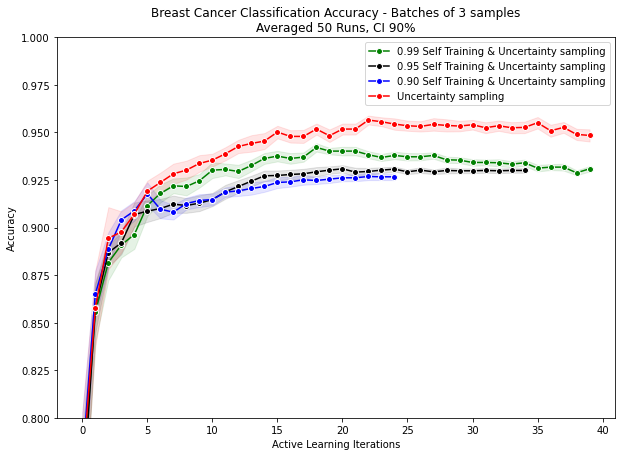

In [50]:
fig = plt.figure(figsize=(10,7))

self_training99_mean = np.mean(uncert_self_training99_metrics, axis=0)
self_training95_mean = np.mean(uncert_self_training95_metrics, axis=0)
self_training90_mean = np.mean(uncert_self_training90_metrics, axis=0)
uncert_mean = np.mean(uncert_metrics, axis=0)


plt.plot(self_training99_mean, c="green", marker="o", markersize=6, markeredgecolor="white", label="0.99 Self Training & Uncertainty sampling")
plt.plot(self_training95_mean, c="black", marker="o", markersize=6, markeredgecolor="white", label="0.95 Self Training & Uncertainty sampling")
plt.plot(self_training90_mean, c="blue", marker="o", markersize=6, markeredgecolor="white", label="0.90 Self Training & Uncertainty sampling")
plt.plot(uncert_mean, c="red", marker="o", markersize=6, markeredgecolor="white", label="Uncertainty sampling")


zscore_90_confidence = 1.65
self_training99_ci = sem(uncert_self_training99_metrics) * zscore_90_confidence
plt.fill_between(range(len(self_training99_mean)), (self_training99_mean-self_training99_ci), (self_training99_mean+self_training99_ci), color='green', alpha=0.1)
self_training95_ci = sem(uncert_self_training95_metrics) * zscore_90_confidence
plt.fill_between(range(len(self_training95_mean)), (self_training95_mean-self_training95_ci),(self_training95_mean+self_training95_ci), color='black', alpha=0.1)
self_training90_ci = sem(uncert_self_training90_metrics) * zscore_90_confidence
plt.fill_between(range(len(self_training90_mean)), (self_training90_mean-self_training90_ci),(self_training90_mean+self_training90_ci), color='blue', alpha=0.1)
uncert_ci = sem(uncert_metrics) * zscore_90_confidence
plt.fill_between(range(len(uncert_mean)), (uncert_mean-uncert_ci),(uncert_mean+uncert_ci), color='red', alpha=0.1)


plt.title(f"Breast Cancer Classification Accuracy - Batches of {sample_size} samples\nAveraged {repeat_n} Runs, CI 90%")
plt.ylim((0.8, 1))
plt.xlabel("Active Learning Iterations")
plt.ylabel("Accuracy")
plt.legend()
plt.plot()

### Results significance

In [47]:
ranksums(uncert_mean, self_training99_mean, alternative="less")

RanksumsResult(statistic=4.378239541354662, pvalue=0.9999940179094597)

In [48]:
ranksums(uncert_mean, self_training95_mean, alternative="less")

RanksumsResult(statistic=5.012585663865904, pvalue=0.9999997314827296)

In [49]:
ranksums(uncert_mean, self_training95_mean, alternative="less")

RanksumsResult(statistic=5.012585663865904, pvalue=0.9999997314827296)